In [1]:
import os
%pwd

'd:\\ML-Projects\\04-Mobile-Price-Predictor\\research'

In [2]:
os.chdir("../")
%pwd

'd:\\ML-Projects\\04-Mobile-Price-Predictor'

<div style="background-color:black; padding:20px; font-size:15px ; color:white">
    <strong>What Problem We Have?</strong> 
    <br>
    
Our task is to perform a classification on the target variable "Price Range" based on the data and attribute information. To achieve the best possible classification, we will develop a model that accurately predicts the price range of mobile phones.

<div style="background-color:black; padding:20px; font-size:15px ; color:white">

|       | **Attribute** | **Information** |
| :---  |     :---      |       :---      |      
| **1** | battery_power | Total energy a battery can store in one time measured in (mAh) |                
| **2** | blue | Has bluetooth or not |                        
| **3** | clock_speed | Speed at which microprocessor executes instructions |
| **4** | dual_sim | Has dual sim support or not |
| **5** | fc | Front camera (Megapixels) |                     
| **6** | four_g | Has 4G or not |
| **7** | int_memory | Internal memory in (Gigabytes) |              
| **8** | m_dep | Mobile depth in (Cm)  |                      
| **9** | mobile_wt |  Weight of mobile phone |
| **10** | pc | Primary camera (Megapixels) |
| **11** | px_height | Pixel resolution height |                      
| **12** | px_width | Pixel resolution width |
| **13** | ram | Random access memory in (Megabytes)  |              
| **14** | sc_h | Screen height of mobile in (Cm)  |                      
| **15** | sc_w | Screen width of mobile in (Cm) |
| **16** | talk_time | Longest time that a single battery charge will last when you are constantly talking on the phone |
| **17** | three_g | Has 3G or not |                      
| **18** | touch_screen | Has touch screen or not | 
| **19** | wifi | Has wifi or not |              
| **20** | n_cores | Number of cores of processor |                       
| **21** | **price_range** | This is the Target variable with value of **0: (Low Cost**), **1: (Medium Cost**), **2: (High Cost**), and **3: (Very High Cost**) |

<a id="1"></a>  
# <p style="padding:10px;background-color:#2e5551;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">1. Import Libraries</p>

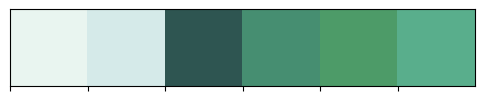

In [76]:
# Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Train Test Split
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# KFold
from sklearn.model_selection import RepeatedStratifiedKFold,KFold

# Validation
from sklearn.model_selection import cross_val_predict,cross_val_score

# Scaling
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, auc, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from statistics import stdev

# Ensembling
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# import xgboost as xg

from sklearn.preprocessing import label_binarize
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

#color pallet and theme
import matplotlib.colors

colors = ["#e9f5f0","#d5eae9","#2e5551",'#468e71','#4d9b68','#59ae8c']
colors2 = ["#2e5551",'#468e71','#4d9b68','#59ae8c', "#e9f5f0","#d5eae9"]
cmap = matplotlib.colors.ListedColormap(colors2)

sns.palplot(sns.color_palette(colors))

<a id="1"></a>  
# <p style="padding:10px;background-color:#2e5551;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">2. Reading the Dataset</p>

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">2.1. Import Dataset</p>

In [6]:
Data = pd.read_csv('artifacts/data_transformation/train_data.csv')

In [8]:
test = pd.read_csv('artifacts/data_transformation/test_data.csv')

In [9]:
# Preview the dataset (train)
Df = pd.DataFrame(Data)
Df.head(5)

Unnamed: 0  battery_power  blue  clock_speed  dual_sim  fc  four_g  \
0           0            842     0          2.2         0   1       0   
1           1           1021     1          0.5         1   0       1   
2           2            563     1          0.5         1   2       1   
3           3            615     1          2.5         0   0       0   
4           4           1821     1          1.2         0  13       1   

   int_memory  m_dep  mobile_wt  ...  px_height  px_width   ram  sc_h  sc_w  \
0           7    0.6        188  ...         65       756  2549     9  7.00   
1          53    0.7        136  ...        905      1988  2631    17  3.00   
2          41    0.9        145  ...       1263      1716  2603    11  2.54   
3          10    0.8        131  ...       1216      1786  2769    16  8.00   
4          44    0.6        141  ...       1208      1212  1411     8  2.54   

   talk_time  three_g  touch_screen  wifi  price_range  
0         19        0             0     1            1  
1          7        1             1     0            2  
2          9        1             1     0            2  
3         11        1             0     0            2  
4         15        1             1     0            1  

[5 rows x 22 columns]

In [10]:
# Preview the dataset (test)
Df_test = pd.DataFrame(test)
Df_test.head(5)

Unnamed: 0  battery_power  blue  clock_speed  dual_sim  fc  four_g  \
0           0           1043     1          1.8         1  14       0   
1           1            841     1          0.5         1   4       1   
2           2           1807     1          2.8         0   1       0   
3           3           1546     0          0.5         1  18       1   
4           4           1434     0          1.4         0  11       1   

   int_memory  m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  \
0           5    0.5        193  ...  16        226      1412  3476    12   
1          61    0.8        191  ...  12        746       857  3895     6   
2          27    0.9        186  ...   4       1270      1366  2396    17   
3          25    0.5         96  ...  20        295      1752  3893    10   
4          49    0.5        108  ...  18        749       810  1773    15   

    sc_w  talk_time  three_g  touch_screen  wifi  
0   7.00          2        0             1     0  
1   2.54          7        1             0     0  
2  10.00         10        0             1     1  
3   2.54          7        1             1     0  
4   8.00          7        1             0     1  

[5 rows x 21 columns]

<a id="1"></a>  
# <p style="padding:10px;background-color:#254441;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">3. Model Building</p>

<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#3a957f;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;">ㅤ3.1. Decision Tree (DTs)ㅤ</span>

<div style="background-color:black; padding:20px; font-size:15px ; color:white">
    
**Decision Tree** is a machine learning algorithm used for classification and regression tasks. It creates a tree-like model by recursively partitioning the data based on the most discriminative features. Decision Tree can handle numerical and categorical data, is transparent and interpretable, and can be used for feature selection. However, Decision Tree is prone to overfitting, especially when the tree is deep and the data is noisy. Pruning, regularization, and ensemble methods can be used to prevent overfitting. Decision Tree has been applied in many machine learning applications, but careful attention should be paid to prevent overfitting and ensure optimal performance.

#### 🎄Declare Feature Vector and Target Variable

In [11]:
df = Df
X = df.drop('price_range', axis=1)
y = df['price_range'].values.reshape(-1, 1)

In [12]:
# Check the shape of X and y
print ('X:', X.shape,'\ny:', y.shape)

X: (2000, 21) 
y: (2000, 1)


#### 🎄Find the Best Test Size

In [13]:
# Array of test size value from 0.2 to 0.3
test_size = np.arange(start=0.2, stop=0.35, step= 0.05)

# Initialize a list where we'll store the score of each test size
score =[]
for size in test_size:
    X_train1, X_test1, y_train1, y_test1 = train_test_split (X, y, test_size=size, random_state=0)
    DT_Clf = DecisionTreeClassifier (max_depth=3)
    DT_Clf.fit (X_train1, y_train1)
    score.append (DT_Clf.score (X_test1, y_test1))

# Create a dataframe to display the results 
r= pd.DataFrame({'Test size': test_size , 'Score': score})
r.sort_values(by = ['Score'], ascending = False, inplace = True)
r.style.highlight_max(color='green')

<div style="background-color:black; padding:20px; font-size:15px ; color:white">

We consider the test size **0.25** for **Decision Tree** modeling. 

#### 🎄Train Test Split

In [14]:
# Split X and y into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split (X, y, stratify=y, test_size = 0.25, random_state = 0)

In [15]:
# check the shape of X_train, X_test, y_train and y_test
print('X_train shape: ', X_train1.shape)
print('X_test shape: ', X_test1.shape)
print('y_train shape: ', y_train1.shape)
print('y_test shape: ', y_test1.shape)

X_train shape:  (1500, 21)
X_test shape:  (500, 21)
y_train shape:  (1500, 1)
y_test shape:  (500, 1)


#### 🎄Train Decision Tree Model

In [16]:
# Instantiate the model
DT_model = DecisionTreeClassifier(max_depth=3)

# Fit the model to the training set
DT_model.fit(X_train1, y_train1)

DecisionTreeClassifier(max_depth=3)

#### 🎄Predict X-test

In [17]:
y_pred = DT_model.predict(X_test1)

#### 🎄Check Accuracy Score

In [18]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test1, y_pred)))

Model accuracy score: 0.7520


#### 🎄Check for overfitting and underfitting

In [19]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(DT_model.score(X_train1, y_train1)))
print('Test set score: {:.4f}'.format(DT_model.score(X_test1, y_test1)))

Training set score: 0.7693
Test set score: 0.7520


<div style="background-color:black; padding:20px; font-size:15px ; color:white">

**Explanations:**
    
- The **training-set** accuracy score is **0.7693** while the **test-set** accuracy to be **0.7520**. These two values are quite comparable. So, there is no question of overfitting.

#### 🎄K-Fold Cross-validation

In [22]:
kf = KFold(n_splits=10, shuffle=False)

#### 🎄Cross Validation Accuracy

In [25]:
score = cross_val_score(DT_model, X_train1, y_train1, cv=kf, scoring='accuracy')
DT_model_cv_score = score.mean()
DT_model_cv_stdev = stdev(score)
print('Cross Validation Accuracy scores are:\n {}'.format(score))

Cross Validation Accuracy scores are:
 [0.72666667 0.76       0.77333333 0.74666667 0.74666667 0.68666667
 0.74       0.75333333 0.7        0.78      ]


In [26]:
Accuracy  = ['Cross Validation Accuracy ']
DT_A = pd.DataFrame({'CV Mean':DT_model_cv_score,'Std':DT_model_cv_stdev},index=Accuracy )
DT_A

CV Mean       Std
Cross Validation Accuracy   0.741333  0.029781

<div style="background-color:black; padding:20px; font-size:15px ; color:white">

**Interpretation:**

- Using the **mean cross-validation**, we can conclude that we expect the model to be around **74.13 %** accurate on average.
- We can see that 10-fold cross-validation accuracy **does not** result in performance improvement for this model.

#### 🎄Confusion Matrix

NameError: name 'plt' is not defined

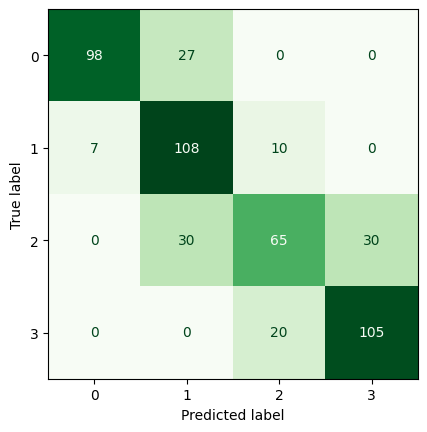

In [27]:
ConfusionMatrixDisplay.from_estimator(DT_model, X_test1, y_test1, colorbar=False, cmap='Greens')
plt.title('Confusion Matrix of Base Decision Tree')
plt.grid(False)

#### 🎄Classification Report

In [28]:
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       125
           1       0.65      0.86      0.74       125
           2       0.68      0.52      0.59       125
           3       0.78      0.84      0.81       125

    accuracy                           0.75       500
   macro avg       0.76      0.75      0.75       500
weighted avg       0.76      0.75      0.75       500



#### 🎄Performance Metrics

In [29]:
def metrics_calculator(y_test, y_pred, model_name):
    '''
    This function calculates all desired performance metrics for a given model.
    '''
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = [model_name])
    return result

In [30]:
BaseDT_result = metrics_calculator(y_test1, y_pred, 'Base Decision Tree')
BaseDT_result

Base Decision Tree
Accuracy             0.752000
Precision            0.762467
Recall               0.752000
F1-score             0.748901

#### 🎄ROC Curve

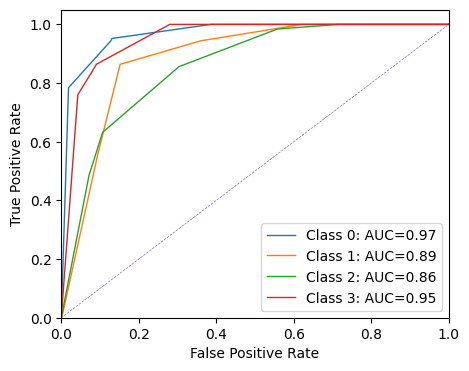

In [33]:
y_Pred_prob = DT_model.predict_proba(X_test1)

def roc_curve_plot(y_actual, y_predicted_probs, figsize=(5, 4), title=None, legend_loc='best'):

    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    thres = {}
    roc_auc = {}

    n_class = y_predicted_probs.shape[1]
    for i in range(n_class):
        fpr[i], tpr[i], thres[i] = roc_curve(y_actual == i, y_predicted_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Create a figure and plot the ROC curve for each class
    plt.figure(figsize=figsize)
    for i in range(n_class):
        plt.plot(fpr[i], tpr[i], linewidth=1, label='Class {}: AUC={:.2f}'.format(i, roc_auc[i]))

    # Add diagonal line and axis labels
    plt.plot([0, 1], [0, 1], '--', linewidth=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Set axis limits and add title and legend
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    if title is not None:
        plt.title(title)
    plt.legend(loc=legend_loc)

    # Show the plot
    plt.show()
        
roc_curve_plot(y_test1, y_Pred_prob)

#### 🎄Plot Tree

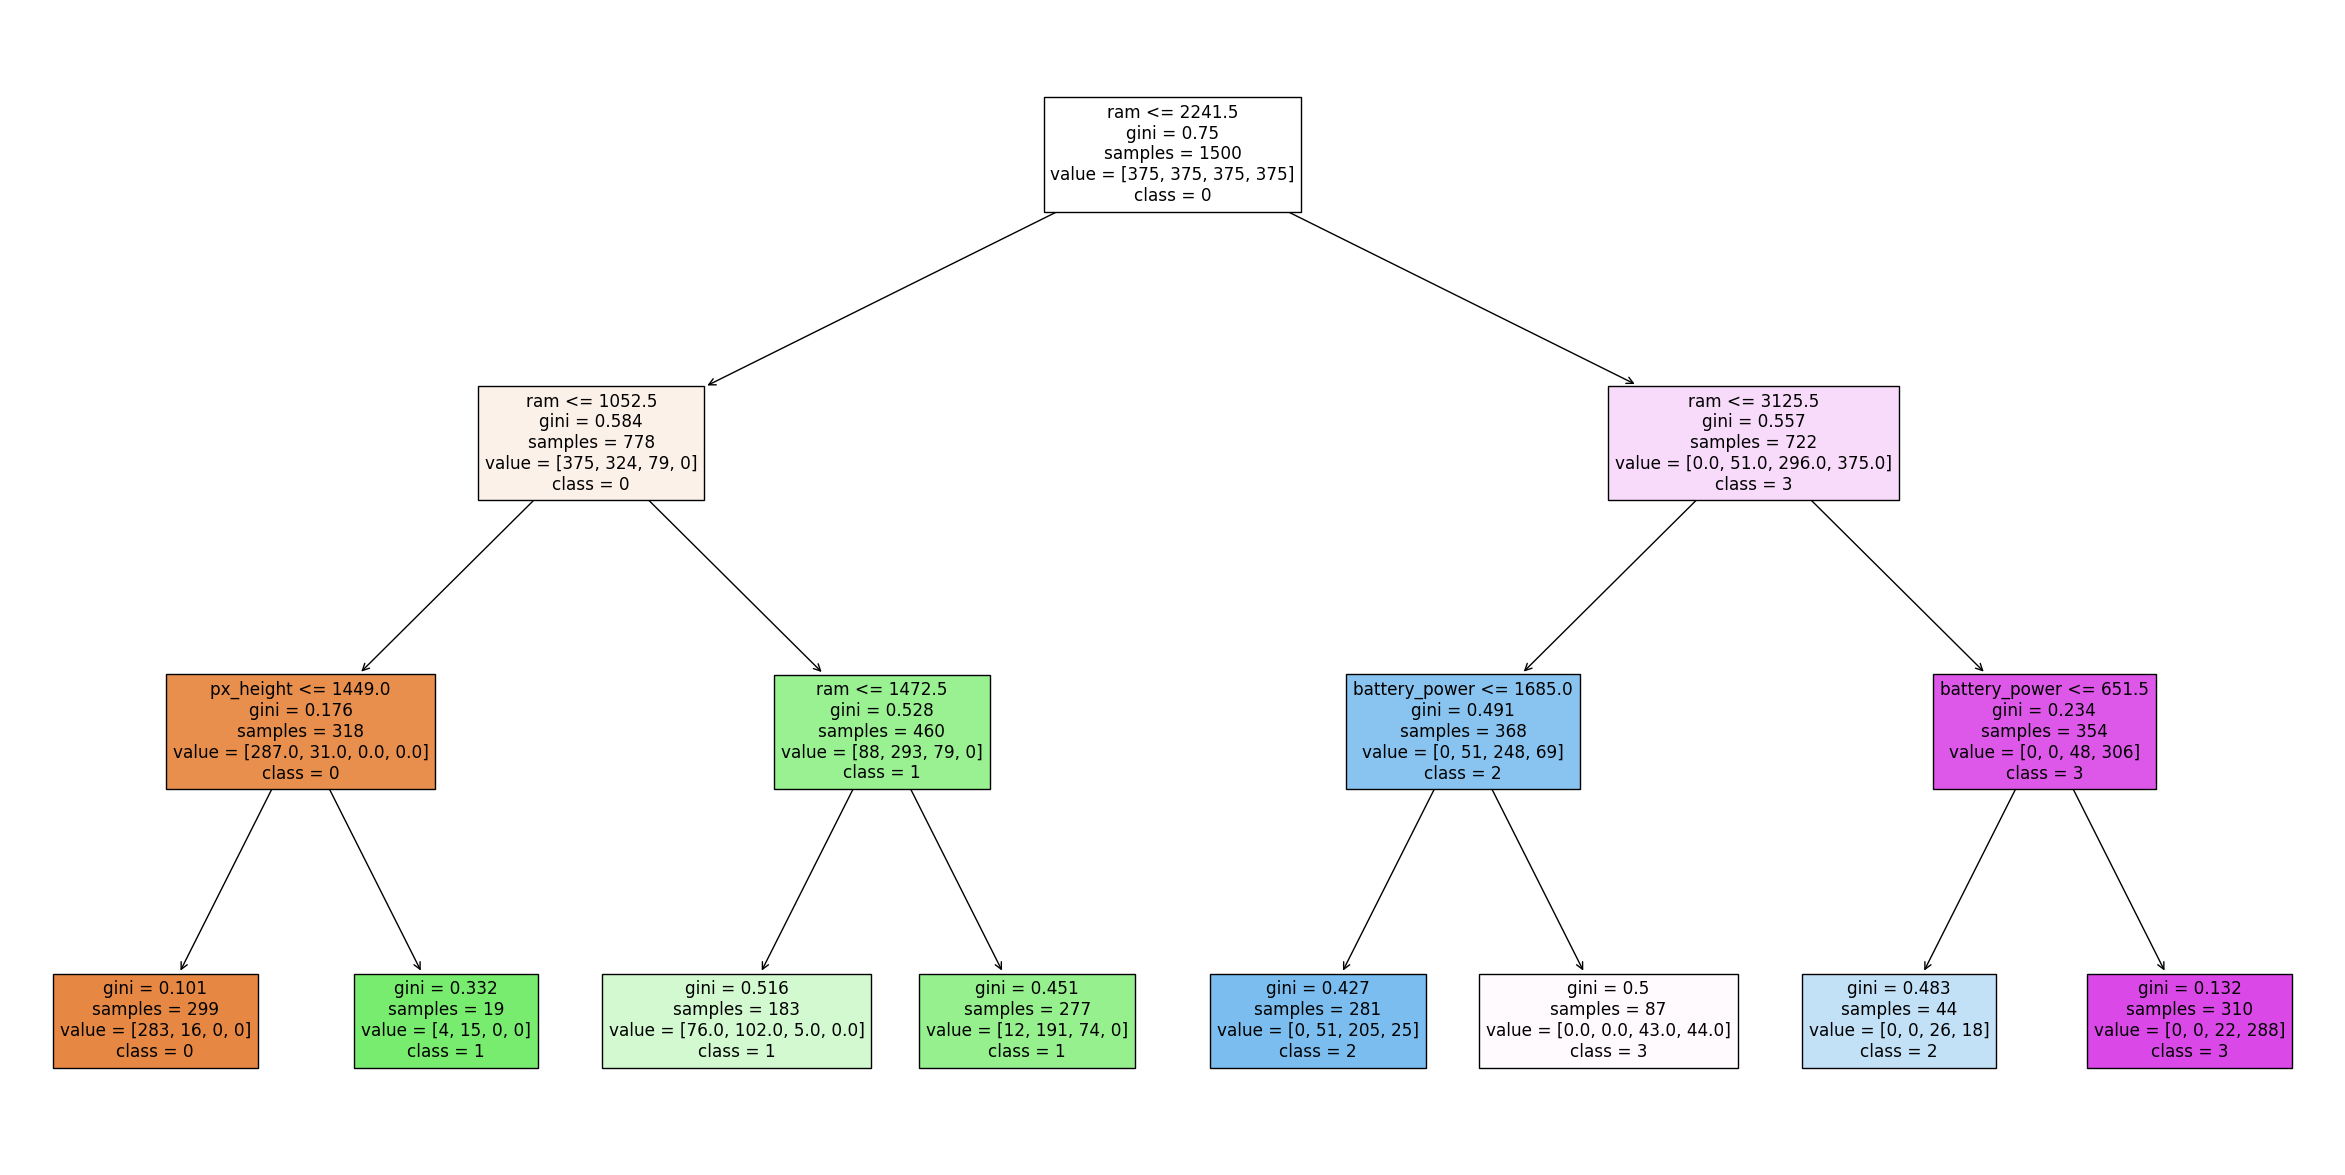

In [34]:
feature_names = X.columns
target_names = ["0", "1", "2", "3"]

fig = plt.figure(figsize = (30, 15))
Plot = tree.plot_tree (DT_model, feature_names = feature_names, class_names = target_names, filled = True)

#### 🎄Feature Importance

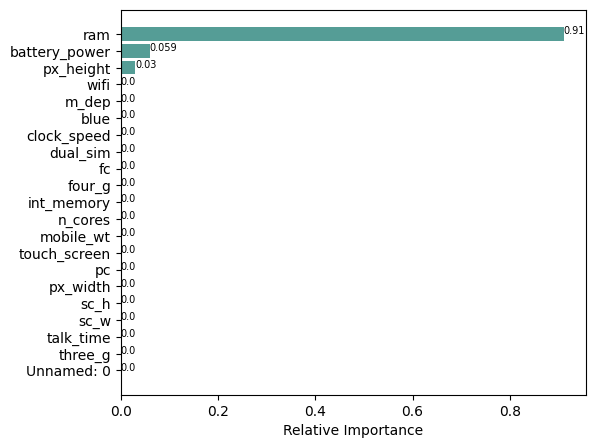

In [35]:
# Get feature importances from the Random Forest model
importances = DT_model.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize=(6, 5))
plt.barh(range(len(indices)), importances[indices], color='#559d96', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Add labels to the bars
for i, v in enumerate(importances[indices]):
    plt.text(v, i, str(round(v, 3)), color='black', fontsize= 7)

plt.show()

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">🟢Tune Decision Tree Hyperparameters Using GridSearchCV</p>

In [36]:
# Finding optimal hyperparameters(GridSearchCV)

# Define model
model = DecisionTreeClassifier()

# Define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

# Define search parameters
max_depth = range(2, 19, 1)
criterion = ['entropy', 'gini']   

#min_samples_split = [2, 3, 4]
#min_samples_leaf = [1, 2, 3]

param_grid = {'max_depth': max_depth, 'criterion':criterion}

# Define search
search = GridSearchCV(model, param_grid, scoring='accuracy', n_jobs=-1, cv=cv)

# Execute search
GridSearchCV = search.fit(X_train1, y_train1)

# Set the clf to the best combination of parameters
DT_modelcv = GridSearchCV.best_estimator_

# Summarize result
print('Best Score: %s' % GridSearchCV.best_score_)
print('Best Hyperparameters: %s' % GridSearchCV.best_params_)

Best Score: 0.8453333333333333
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 7}


### Tuned Decision Tree Model Evaluation

#### 🎄Train Tuned Model

In [37]:
DT_modelcv.fit(X_train1, y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

#### 🎄Predict Tuned Model X-test

In [38]:
y_pred = DT_modelcv.predict(X_test1)

#### 🎄Check Tuned Model Accuracy Score

In [39]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test1, y_pred)))

Model accuracy score: 0.8520


#### 🎄Tuned Model Confusion Matrix

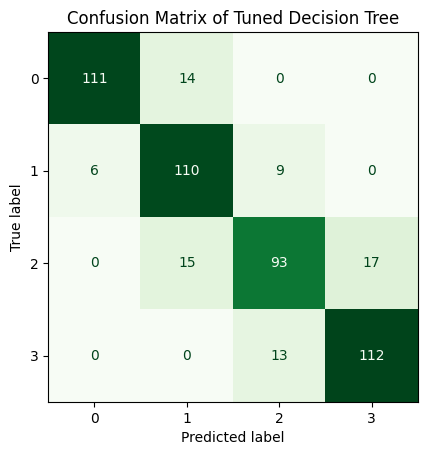

In [40]:
ConfusionMatrixDisplay.from_estimator(DT_modelcv, X_test1, y_test1, colorbar=False, cmap='Greens')
plt.title('Confusion Matrix of Tuned Decision Tree')
plt.grid(False)

#### 🎄Tuned Model Classification Report

In [41]:
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       125
           1       0.79      0.88      0.83       125
           2       0.81      0.74      0.78       125
           3       0.87      0.90      0.88       125

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



#### 🎄Tuned Model Performance Metrics

In [42]:
TunedDT_result = metrics_calculator(y_test1, y_pred, 'Tuned Decision Tree')
TunedDT_result

Tuned Decision Tree
Accuracy              0.852000
Precision             0.854249
Recall                0.852000
F1-score              0.851895

#### 🎄ROC Curve

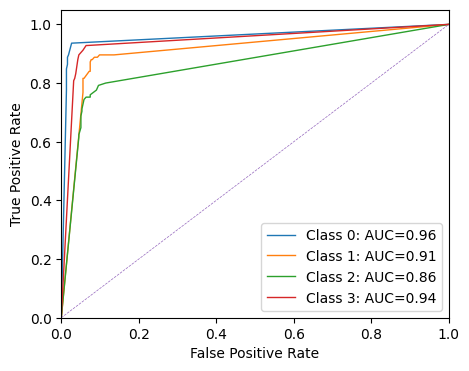

In [43]:
y_Pred_prob = DT_modelcv.predict_proba(X_test1)

def roc_curve_plot(y_actual, y_predicted_probs, figsize=(5, 4), title=None, legend_loc='best'):

    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    thres = {}
    roc_auc = {}

    n_class = y_predicted_probs.shape[1]
    for i in range(n_class):
        fpr[i], tpr[i], thres[i] = roc_curve(y_actual == i, y_predicted_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Create a figure and plot the ROC curve for each class
    plt.figure(figsize=figsize)
    for i in range(n_class):
        plt.plot(fpr[i], tpr[i], linewidth=1, label='Class {}: AUC={:.2f}'.format(i, roc_auc[i]))

    # Add diagonal line and axis labels
    plt.plot([0, 1], [0, 1], '--', linewidth=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Set axis limits and add title and legend
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    if title is not None:
        plt.title(title)
    plt.legend(loc=legend_loc)

    # Show the plot
    plt.show()
        
roc_curve_plot(y_test1, y_Pred_prob)

#### 🎄Plot Tree

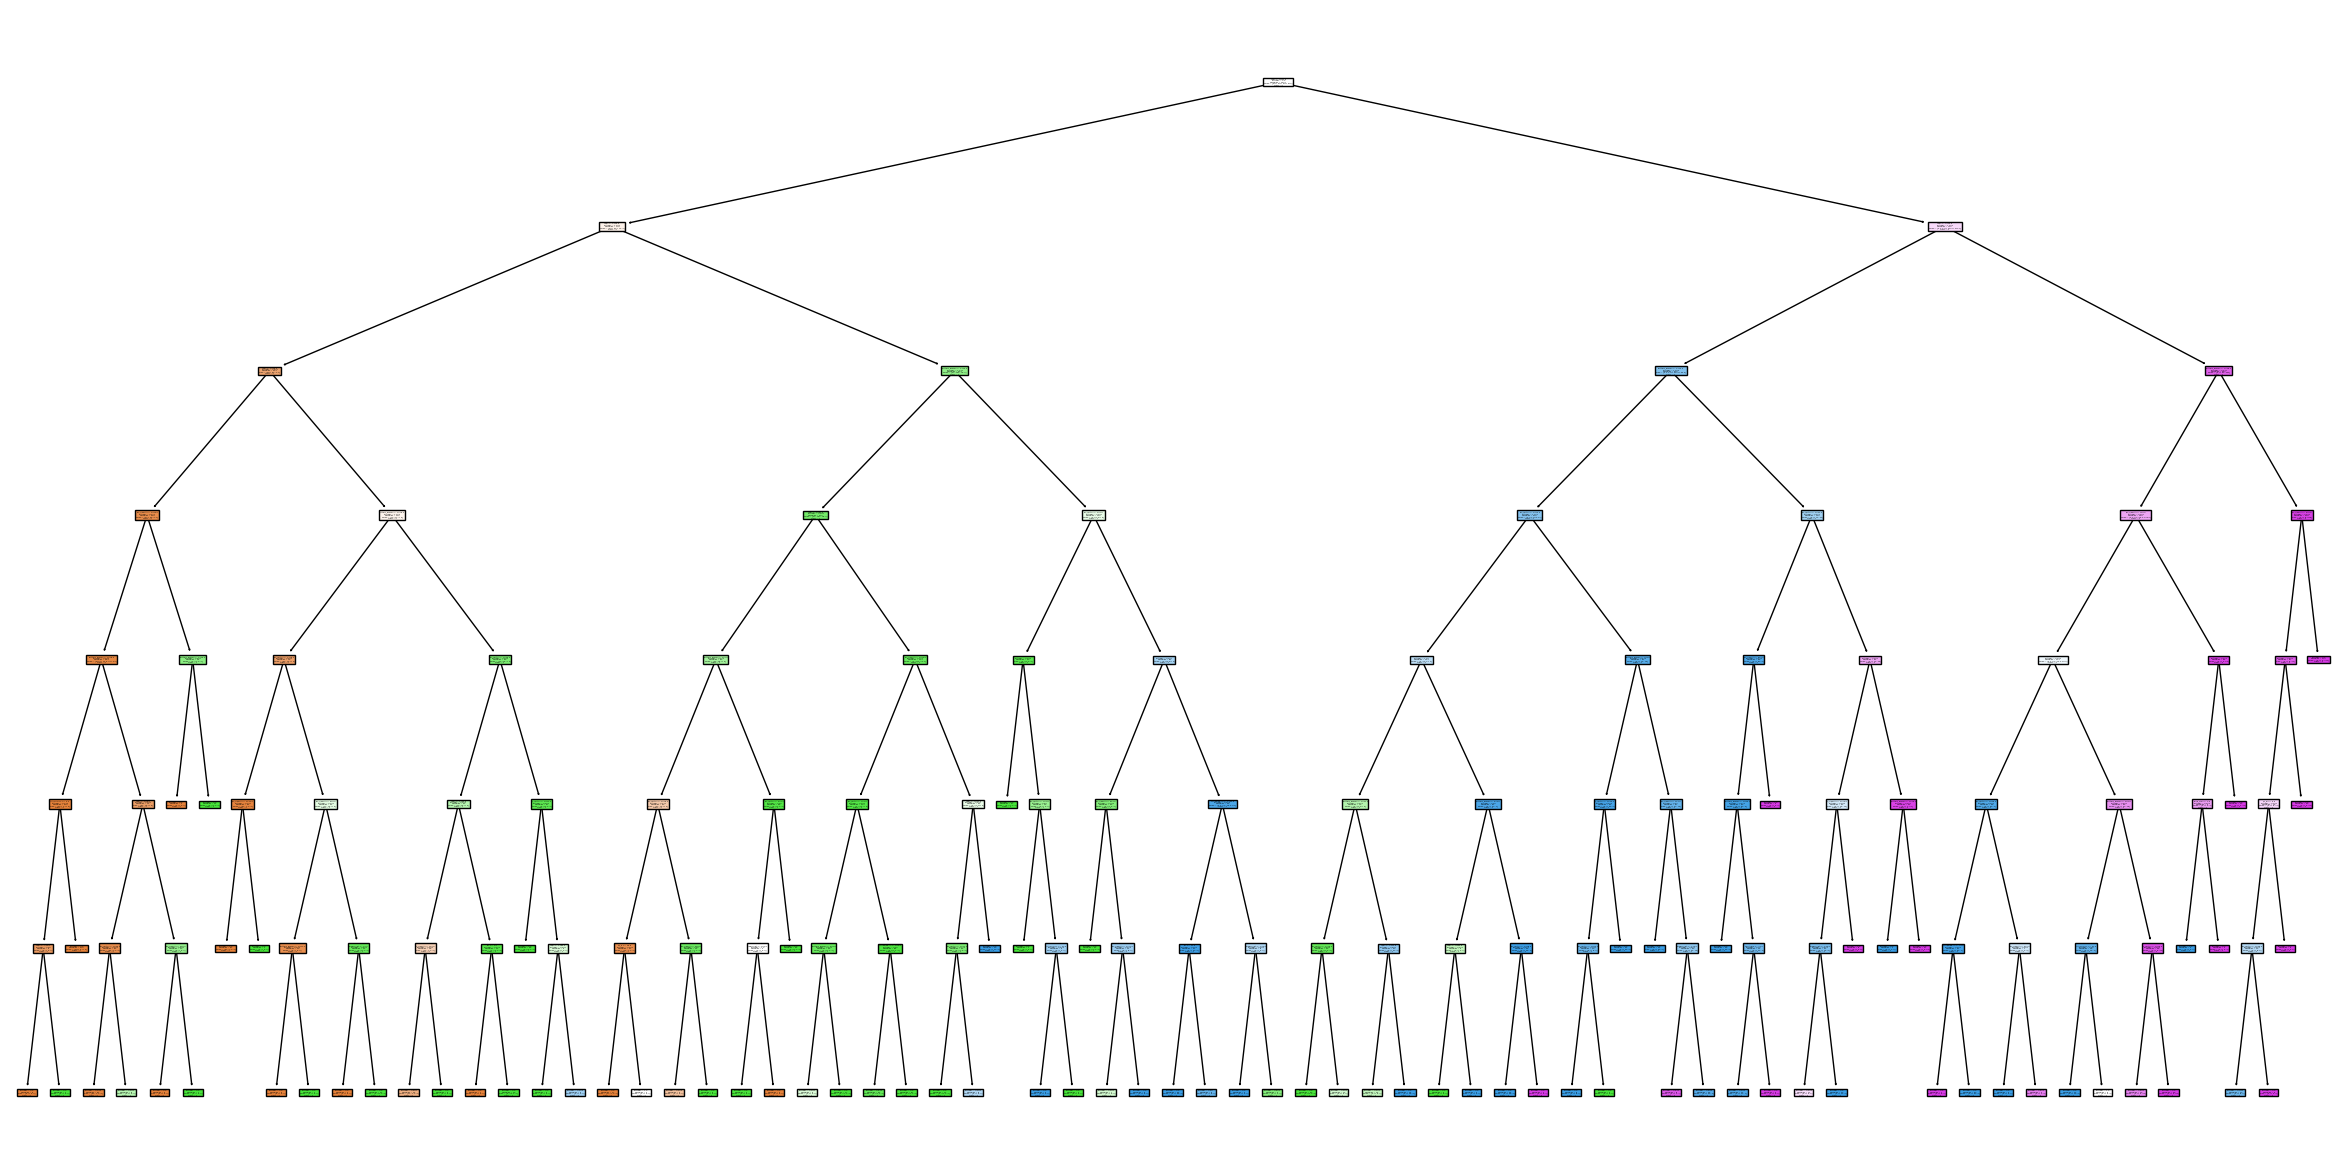

In [44]:
feature_names = X.columns
target_names = ["0", "1", "2", "3"]

fig = plt.figure(figsize = (30, 15))
Plot = tree.plot_tree (DT_modelcv, feature_names = feature_names, class_names = target_names, filled = True)

#### 🎄Tuned Model Feature Importance

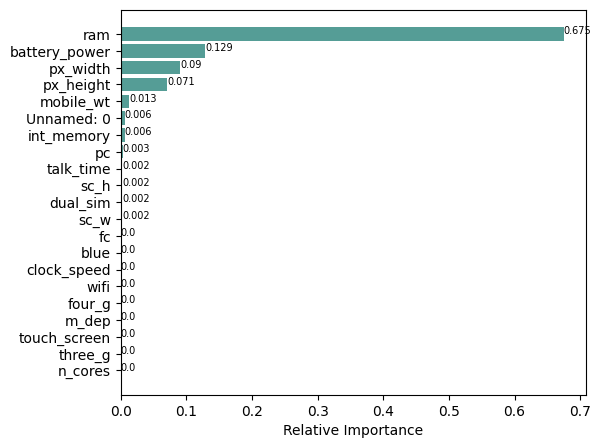

In [45]:
# Get feature importances from the Random Forest model
importances = DT_modelcv.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize=(6, 5))
plt.barh(range(len(indices)), importances[indices], color='#559d96', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Add labels to the bars
for i, v in enumerate(importances[indices]):
    plt.text(v, i, str(round(v, 3)), color='black', fontsize= 7)

plt.show()

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">🟢Cost Complexity Pruning</p>

<div style="background-color:black; padding:20px; font-size:15px ; color:white">

**Pruning** is a powerful technique used in machine learning and search algorithms to reduce the size of decision trees by removing non-critical and redundant sections. The main goal of pruning is to compress the data and simplify the final classifier, which helps to improve predictive accuracy and reduce overfitting.

In [46]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Generate the cost complexity pruning path for the decision tree using the training data
path = clf.cost_complexity_pruning_path(X_train1, y_train1)

# Extract the list of alphas and impurities from the pruning path
ccp_alphas = path.ccp_alphas
impurities = path.impurities

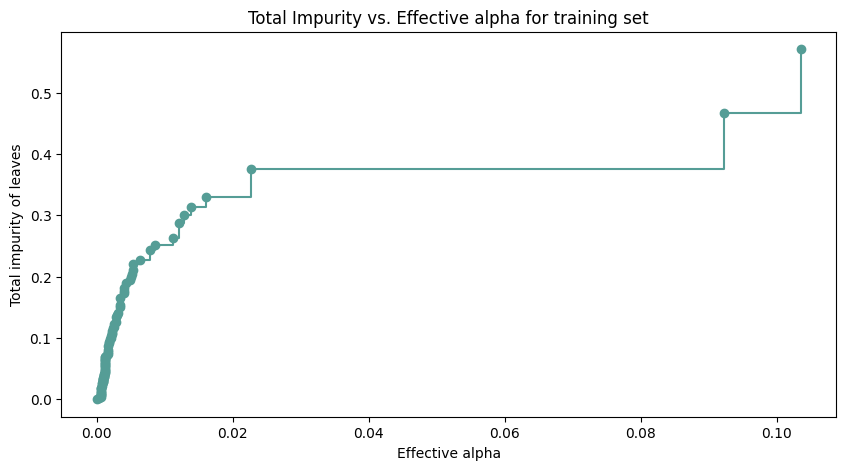

In [47]:
# Create a figure and axis object for the plot
fig, ax = plt.subplots(figsize=(10,5))

# Plot the total impurity vs. effective alpha using a step plot
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', color='#559d96', drawstyle="steps-post")

# Set the x and y labels and title for the plot
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total Impurity vs. Effective alpha for training set")

# Show the plot
plt.show()

<div style="background-color:black; padding:20px; font-size:15px ; color:white">

**Explanations:**
    
- To train a pruned decision tree, we can set the **ccp_alpha** parameter of the DecisionTreeClassifier to these effective alpha values. We can then loop over the alpha values and fit a decision tree with each alpha value, and compute the accuracy of each pruned decision tree on both the training and test sets. By comparing the accuracy values at different alpha values, we can select the alpha value that results in the best balance between complexity and accuracy for our decision tree.

In [48]:
# Initialize empty lists to store classifier objects and evaluation metrics
clfs = []
accuracy_train = []
accuracy_test = []
recall_train = []
recall_test = []

# Loop through the values of ccp_alpha
for ccp_alpha in ccp_alphas:
    # Create a decision tree classifier object with the given value of ccp_alpha
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    
    # Fit the classifier to the training data
    clf.fit(X_train1, y_train1)
    
    # Generate predictions for the training and test sets
    y_train_pred = clf.predict(X_train1)
    y_test_pred = clf.predict(X_test1)
    
    # Compute and store the accuracy scores for the training and test sets
    accuracy_train.append(clf.score(X_train1, y_train1))
    accuracy_test.append(clf.score(X_test1, y_test1))
    
    # Compute and store the recall scores for the training and test sets
    recall_train.append(metrics.recall_score(y_train1, y_train_pred, average='micro'))
    recall_test.append(metrics.recall_score(y_test1, y_test_pred, average='micro'))
    
    # Store the classifier object in the list of classifiers
    clfs.append(clf)

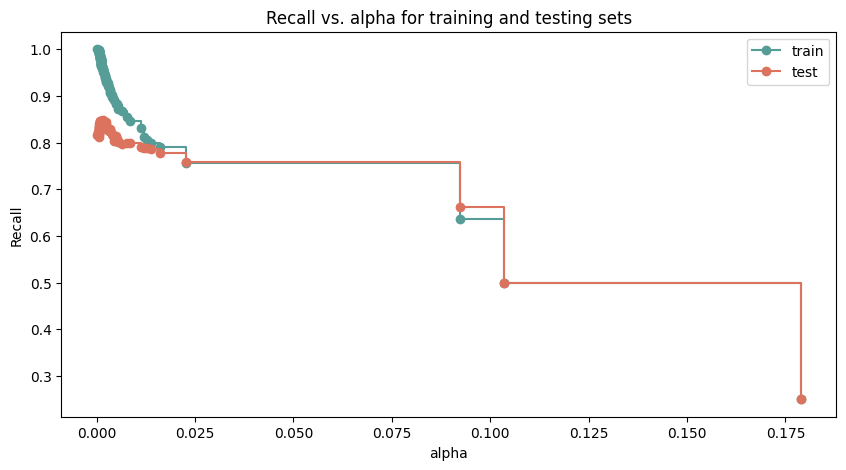

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))

# Set the x-axis and y-axis label to "alpha" and "Recall"
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")

# Set the title of the plot
ax.set_title("Recall vs. alpha for training and testing sets")

# Plot the recall scores for the training and test set as a function of ccp_alpha
ax.plot(ccp_alphas, recall_train, marker='o', label="train", drawstyle="steps-post", color='#559d96')
ax.plot(ccp_alphas, recall_test, marker='o', label="test", drawstyle="steps-post", color='#db735e')

# legend
ax.legend()
plt.show()

<div style="background-color:black; padding:20px; font-size:15px ; color:white">

**Explanations:**
    
- We get a **higher recall** in the test data at **0.0027** of **alpha**.

#### 🎄Train Pruning  Model

In [50]:
DT_Pruning = DecisionTreeClassifier(ccp_alpha= 0.0027, criterion= 'entropy', max_depth= 10)
DT_Pruning.fit(X_train1, y_train1)

DecisionTreeClassifier(ccp_alpha=0.0027, criterion='entropy', max_depth=10)

#### 🎄Predict X-test

In [51]:
y_pred = DT_Pruning.predict(X_test1)

#### 🎄Pruned Model Confusion Matrix

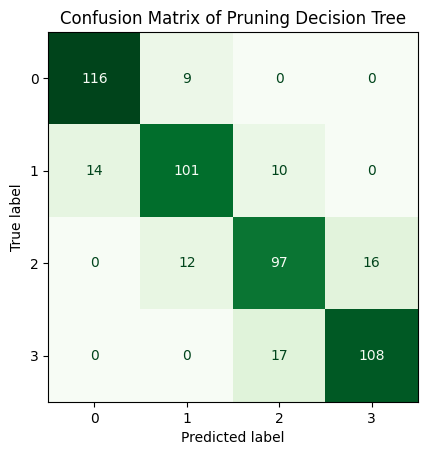

In [52]:
ConfusionMatrixDisplay.from_estimator(DT_Pruning, X_test1, y_test1, colorbar=False, cmap='Greens')
plt.title('Confusion Matrix of Pruning Decision Tree')
plt.grid(False)

#### 🎄Pruned Model Performance Metrics

In [53]:
DT_Pruning_result = metrics_calculator(y_test1, y_pred, 'Post-pruning Decision Tree')
DT_Pruning_result

Post-pruning Decision Tree
Accuracy                     0.844000
Precision                    0.843351
Recall                       0.844000
F1-score                     0.843551

#### 🎄ROC Curve

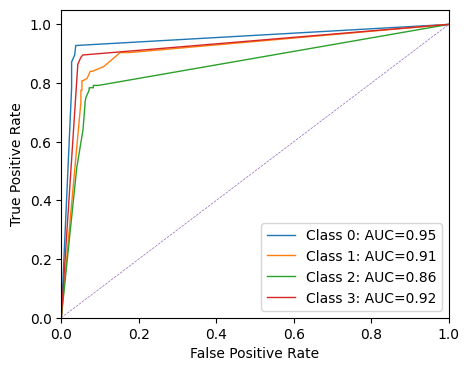

In [54]:
y_Pred_prob = DT_Pruning.predict_proba(X_test1)

def roc_curve_plot(y_actual, y_predicted_probs, figsize=(5, 4), title=None, legend_loc='best'):

    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    thres = {}
    roc_auc = {}

    n_class = y_predicted_probs.shape[1]
    for i in range(n_class):
        fpr[i], tpr[i], thres[i] = roc_curve(y_actual == i, y_predicted_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Create a figure and plot the ROC curve for each class
    plt.figure(figsize=figsize)
    for i in range(n_class):
        plt.plot(fpr[i], tpr[i], linewidth=1, label='Class {}: AUC={:.2f}'.format(i, roc_auc[i]))

    # Add diagonal line and axis labels
    plt.plot([0, 1], [0, 1], '--', linewidth=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Set axis limits and add title and legend
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    if title is not None:
        plt.title(title)
    plt.legend(loc=legend_loc)

    # Show the plot
    plt.show()
        
roc_curve_plot(y_test1, y_Pred_prob)

#### 🎄Tuned Model Feature Importance

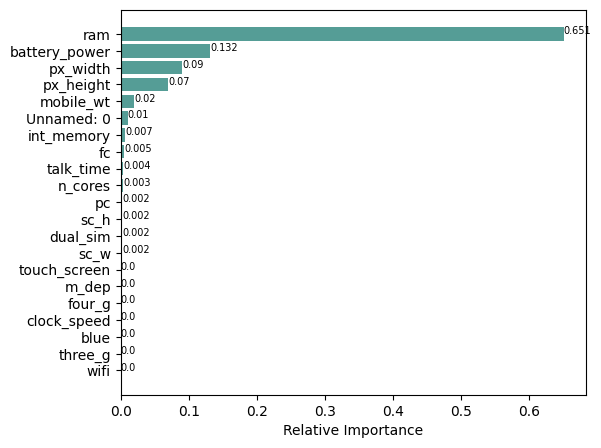

In [55]:
# Get feature importances from the Random Forest model
importances = DT_Pruning.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize=(6, 5))
plt.barh(range(len(indices)), importances[indices], color='#559d96', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Add labels to the bars
for i, v in enumerate(importances[indices]):
    plt.text(v, i, str(round(v, 3)), color='black', fontsize= 7)

plt.show()

<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#3a957f;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;">ㅤ3.2. Random Forestㅤ</span>

<div style="background-color:black; padding:20px; font-size:15px ; color:white">
    
**Random Forest** is an ensemble learning method used for classification and regression tasks. It constructs multiple decision trees at training time and outputs the mode (classification) or mean prediction (regression) of the individual tree predictions. Random Forest prevents overfitting by randomizing the selection of features and data samples used to build each tree, and it is able to handle high-dimensional data and missing values. Random Forest is used in a variety of applications, but it can be computationally expensive for large datasets and requires careful parameter tuning.

#### 🎄X and y Arrays

In [56]:
X = df.drop('price_range', axis=1)
y = df['price_range'].values.reshape(-1, 1)

In [57]:
print ('X:', X.shape,'\ny:', y.shape)

X: (2000, 21) 
y: (2000, 1)


#### 🎄Find the Best Test Size

In [59]:
# Array of test size value from 0.2 to 0.3
test_size = np.arange(start=0.2, stop=0.35, step=0.05)

# Initialize a list where we'll store the score of each test size
score = []
for size in test_size:
    X_train2, X_test2, y_train2, y_test2 = train_test_split (X, y, test_size=size, random_state=0)
    RF_model = RandomForestClassifier ()
    RF_model.fit (X_train2, y_train2)
    score.append (RF_model.score (X_test2, y_test2))
    
# Create a dataframe to display the results   
r= pd.DataFrame({'Test size': test_size, 'Score': score})
r.sort_values(by = ['Score'], ascending = False, inplace = True)
r.style.highlight_max(color='green')

<div style="background-color:black; padding:20px; font-size:15px ; color:white">
We consider the test size **0.25** for **Random Forest** modeling. 

#### 🎄Train Test Split

In [60]:
# Split X and y into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, stratify=y, test_size = 0.25, random_state = 0)

In [61]:
# check the shape of X_train, X_test, y_train and y_test
print('X_train shape:', X_train2.shape)
print('X_test shape:', X_test2.shape)
print('y_train shape:', y_train2.shape)
print('y_test shape:', y_test2.shape)

X_train shape: (1500, 21)
X_test shape: (500, 21)
y_train shape: (1500, 1)
y_test shape: (500, 1)


#### 🎄Train Random Forest Model

In [62]:
# Instantiate the model
RF_model = RandomForestClassifier()

# Fit the model to the training set
RF_model.fit(X_train2, y_train2)

RandomForestClassifier()

#### 🎄Predict X-test

In [63]:
y_pred = RF_model.predict(X_test2)

#### 🎄Check Accuracy Score

In [64]:
print('Model Accuracy Score: {0:0.4f}'. format(accuracy_score(y_test2, y_pred)))

Model Accuracy Score: 0.8840


#### 🎄Check for Overfitting and Underfitting

In [65]:
# Scores on training and test set
print('Training set score: {:.4f}'.format(RF_model.score(X_train2, y_train2)))
print('Test set score: {:.4f}'.format(RF_model.score(X_test2, y_test2)))

Training set score: 1.0000
Test set score: 0.8840


#### 🎄K-Fold Cross-validation

In [66]:
kf = KFold(n_splits=10, shuffle=False)

#### 🎄Cross Validation Accuracy

In [67]:
score = cross_val_score(RF_model, X_train2, y_train2, cv=kf, scoring='accuracy')
RF_model_cv_score = score.mean()
RF_model_cv_stdev = stdev(score)
print('Cross Validation Accuracy scores are:\n {}'.format(score))

Cross Validation Accuracy scores are:
 [0.86666667 0.88666667 0.86666667 0.88       0.86666667 0.81333333
 0.88       0.85333333 0.82666667 0.88666667]


In [68]:
Accuracy = ['Cross Validation Accuracy']
RF_A = pd.DataFrame({'CV Mean':RF_model_cv_score,'Std':RF_model_cv_stdev},index=Accuracy)
RF_A

CV Mean       Std
Cross Validation Accuracy  0.862667  0.024984

<div style="background-color:black; padding:20px; font-size:15px ; color:white">

**Interpretation:**

- Using the **mean cross-validation**, we can conclude that we expect the model to be around **86.8 %** accurate on average.
- We can see that 10-fold cross-validation accuracy **does not** result in performance improvement for this model.

#### 🎄Confusion Matrix

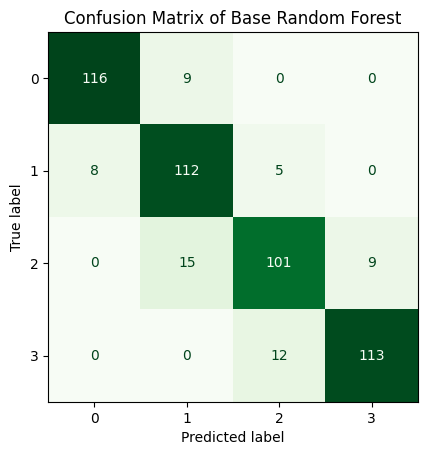

In [69]:
ConfusionMatrixDisplay.from_estimator(RF_model, X_test2, y_test2, colorbar=False, cmap='Greens')
plt.title('Confusion Matrix of Base Random Forest')
plt.grid(False)

#### 🎄Classification Report

In [70]:
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       125
           1       0.82      0.90      0.86       125
           2       0.86      0.81      0.83       125
           3       0.93      0.90      0.91       125

    accuracy                           0.88       500
   macro avg       0.89      0.88      0.88       500
weighted avg       0.89      0.88      0.88       500



#### 🎄Performance Metrics

In [71]:
BaseRF_result = metrics_calculator(y_test2, y_pred, 'Base Random Forest')
BaseRF_result

Base Random Forest
Accuracy             0.884000
Precision            0.885294
Recall               0.884000
F1-score             0.884055

#### 🎄ROC Curve

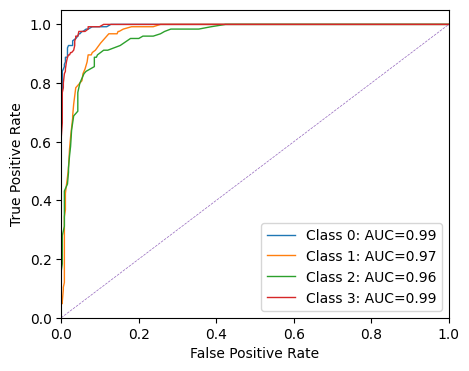

In [72]:
y_Pred_prob = RF_model.predict_proba(X_test2)

def roc_curve_plot(y_actual, y_predicted_probs, figsize=(5, 4), title=None, legend_loc='best'):

    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    thres = {}
    roc_auc = {}

    n_class = y_predicted_probs.shape[1]
    for i in range(n_class):
        fpr[i], tpr[i], thres[i] = roc_curve(y_actual == i, y_predicted_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Create a figure and plot the ROC curve for each class
    plt.figure(figsize=figsize)
    for i in range(n_class):
        plt.plot(fpr[i], tpr[i], linewidth=1, label='Class {}: AUC={:.2f}'.format(i, roc_auc[i]))

    # Add diagonal line and axis labels
    plt.plot([0, 1], [0, 1], '--', linewidth=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Set axis limits and add title and legend
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    if title is not None:
        plt.title(title)
    plt.legend(loc=legend_loc)

    # Show the plot
    plt.show()
        
roc_curve_plot(y_test2, y_Pred_prob)

#### 🎄Plot Forest

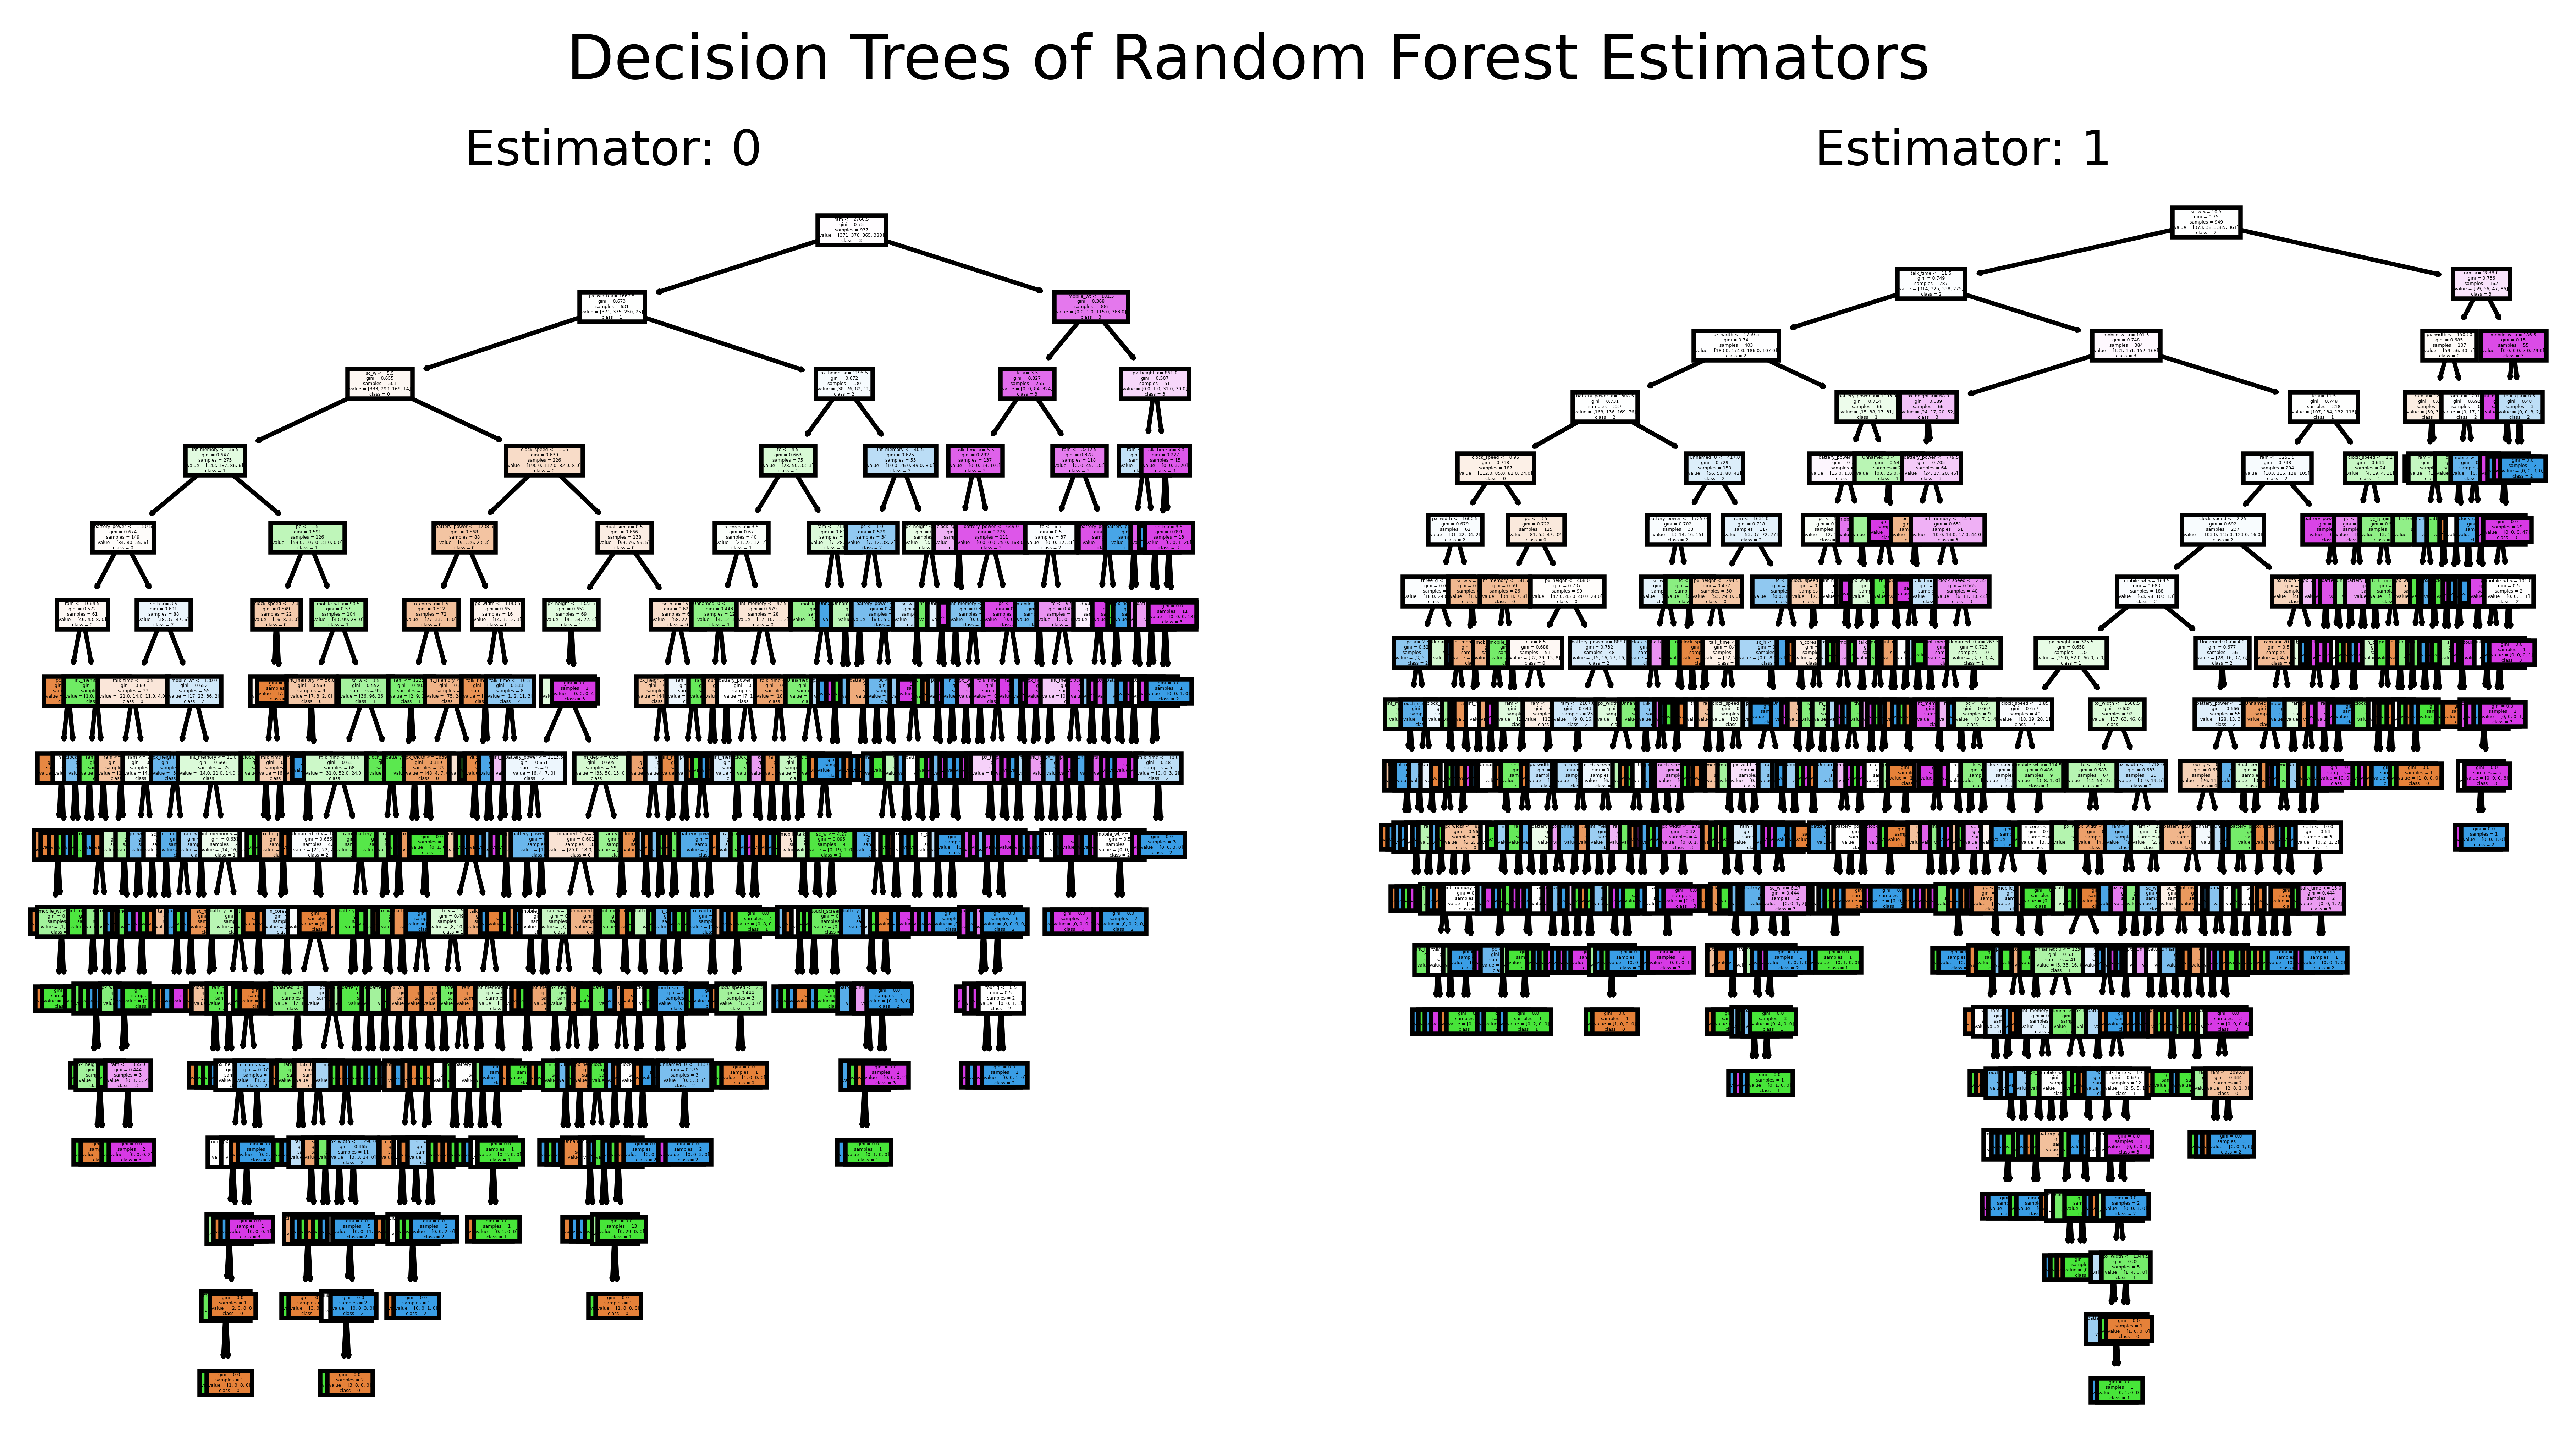

In [73]:
# Get the feature names and class names
fn = X.columns
cn = ["0", "1", "2", "3"]

# Create a figure with two subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5), dpi=900)

# Loop over the two estimators and plot the decision trees
for index in range(0, 2): # for example (2 Estimators)
    tree.plot_tree(RF_model.estimators_[index], feature_names = fn, class_names=cn, filled = True, ax = axes[index]);
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
    
# Add overall title to the figure
fig.suptitle("Decision Trees of Random Forest Estimators", fontsize=14)
plt.show()

#### 🎄Random Forest Feature Importance

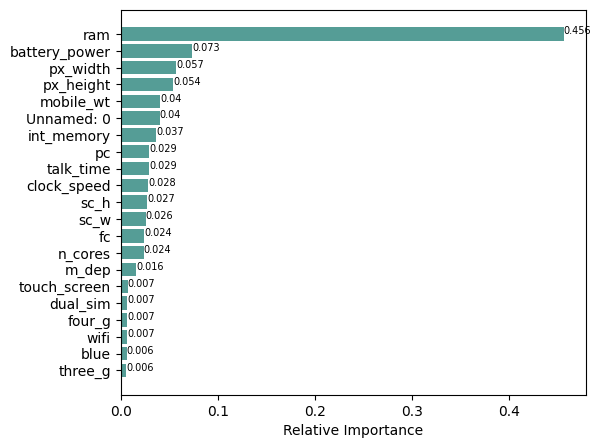

In [74]:
# Get feature importances from the Random Forest model
importances = RF_model.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize=(6, 5))
plt.barh(range(len(indices)), importances[indices], color='#559d96', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Add labels to the bars
for i, v in enumerate(importances[indices]):
    plt.text(v, i, str(round(v, 3)), color='black', fontsize= 7)

plt.show()

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">🟢Tune Random Forest Hyperparameters Using GridSearchCV</p>

In [77]:
# # Finding optimal hyperparameters(GridSearchCV)
# from sklearn.model_selection import GridSearchCV

# # Define model
# model = RandomForestClassifier()

# # Define evaluation
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

# # Define search parameters   
# n_estimators = [10, 50, 100, 200, 500]
# max_depth = [None, 3, 4, 8, 9, 10, 11, 12]
# criterion = ['gini', 'entropy']
# max_features = ['sqrt', 'log2']

# #min_samples_split = [2, 5, 10]
# #min_samples_leaf = [1, 2, 4]

# param_grid = {"n_estimators": n_estimators, "max_depth": max_depth, "criterion" : criterion, "max_features" : max_features} 

# # Define search
# search = GridSearchCV(model, param_grid, scoring='accuracy', n_jobs=-1, cv=cv)

# # Execute search
# GridSearchCV = search.fit(X_train2, y_train2)

# # Set the clf to the best combination of parameters
# RF_modelcv = GridSearchCV.best_estimator_

# # Summarize result
# print('Best Score: %s' % GridSearchCV.best_score_)
# print('Best Hyperparameters: %s' % GridSearchCV.best_params_)

Best Score: 0.8744444444444445
Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 500}


### Tuned Random Forest Model Evaluation

#### 🎄Train Tuned  Model

In [78]:
RF_modelcv.fit(X_train2, y_train2)

RandomForestClassifier(n_estimators=500)

#### 🎄Predict Tuned Model X-test

In [79]:
y_pred = RF_modelcv.predict(X_test2)

#### 🎄Check Tuned Model Accuracy Score

In [80]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test2, y_pred)))

Model accuracy score: 0.8800


#### 🎄Tuned Model Confusion Matrix

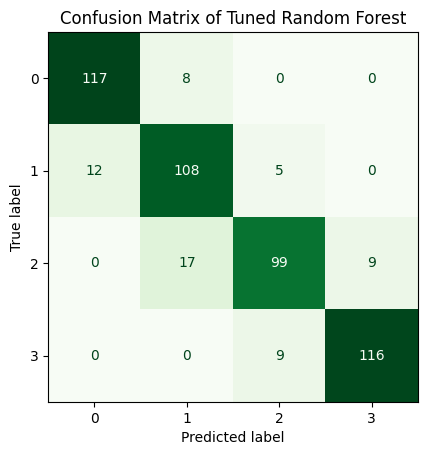

In [81]:
ConfusionMatrixDisplay.from_estimator(RF_modelcv, X_test2, y_test2, colorbar=False, cmap='Greens')
plt.title('Confusion Matrix of Tuned Random Forest')
plt.grid(False)

#### 🎄Tuned Model Classification Report

In [82]:
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       125
           1       0.81      0.86      0.84       125
           2       0.88      0.79      0.83       125
           3       0.93      0.93      0.93       125

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



#### 🎄Tuned Model Performance Metrics

In [83]:
TunedRF_result = metrics_calculator(y_test2, y_pred, 'Tuned Random Forest')
TunedRF_result

Tuned Random Forest
Accuracy              0.880000
Precision             0.880778
Recall                0.880000
F1-score              0.879600

#### 🎄ROC Curve

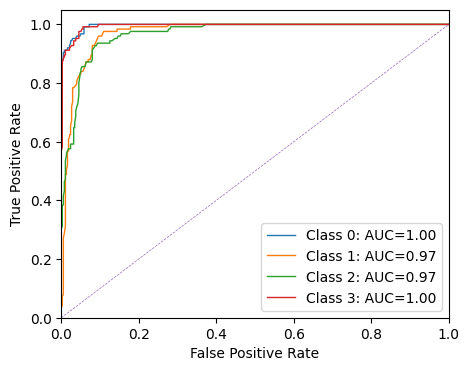

In [84]:
y_Pred_prob = RF_modelcv.predict_proba(X_test2)

def roc_curve_plot(y_actual, y_predicted_probs, figsize=(5, 4), title=None, legend_loc='best'):

    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    thres = {}
    roc_auc = {}

    n_class = y_predicted_probs.shape[1]
    for i in range(n_class):
        fpr[i], tpr[i], thres[i] = roc_curve(y_actual == i, y_predicted_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Create a figure and plot the ROC curve for each class
    plt.figure(figsize=figsize)
    for i in range(n_class):
        plt.plot(fpr[i], tpr[i], linewidth=1, label='Class {}: AUC={:.2f}'.format(i, roc_auc[i]))

    # Add diagonal line and axis labels
    plt.plot([0, 1], [0, 1], '--', linewidth=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Set axis limits and add title and legend
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    if title is not None:
        plt.title(title)
    plt.legend(loc=legend_loc)

    # Show the plot
    plt.show()
        
roc_curve_plot(y_test2, y_Pred_prob)

#### 🎄Plot Forest

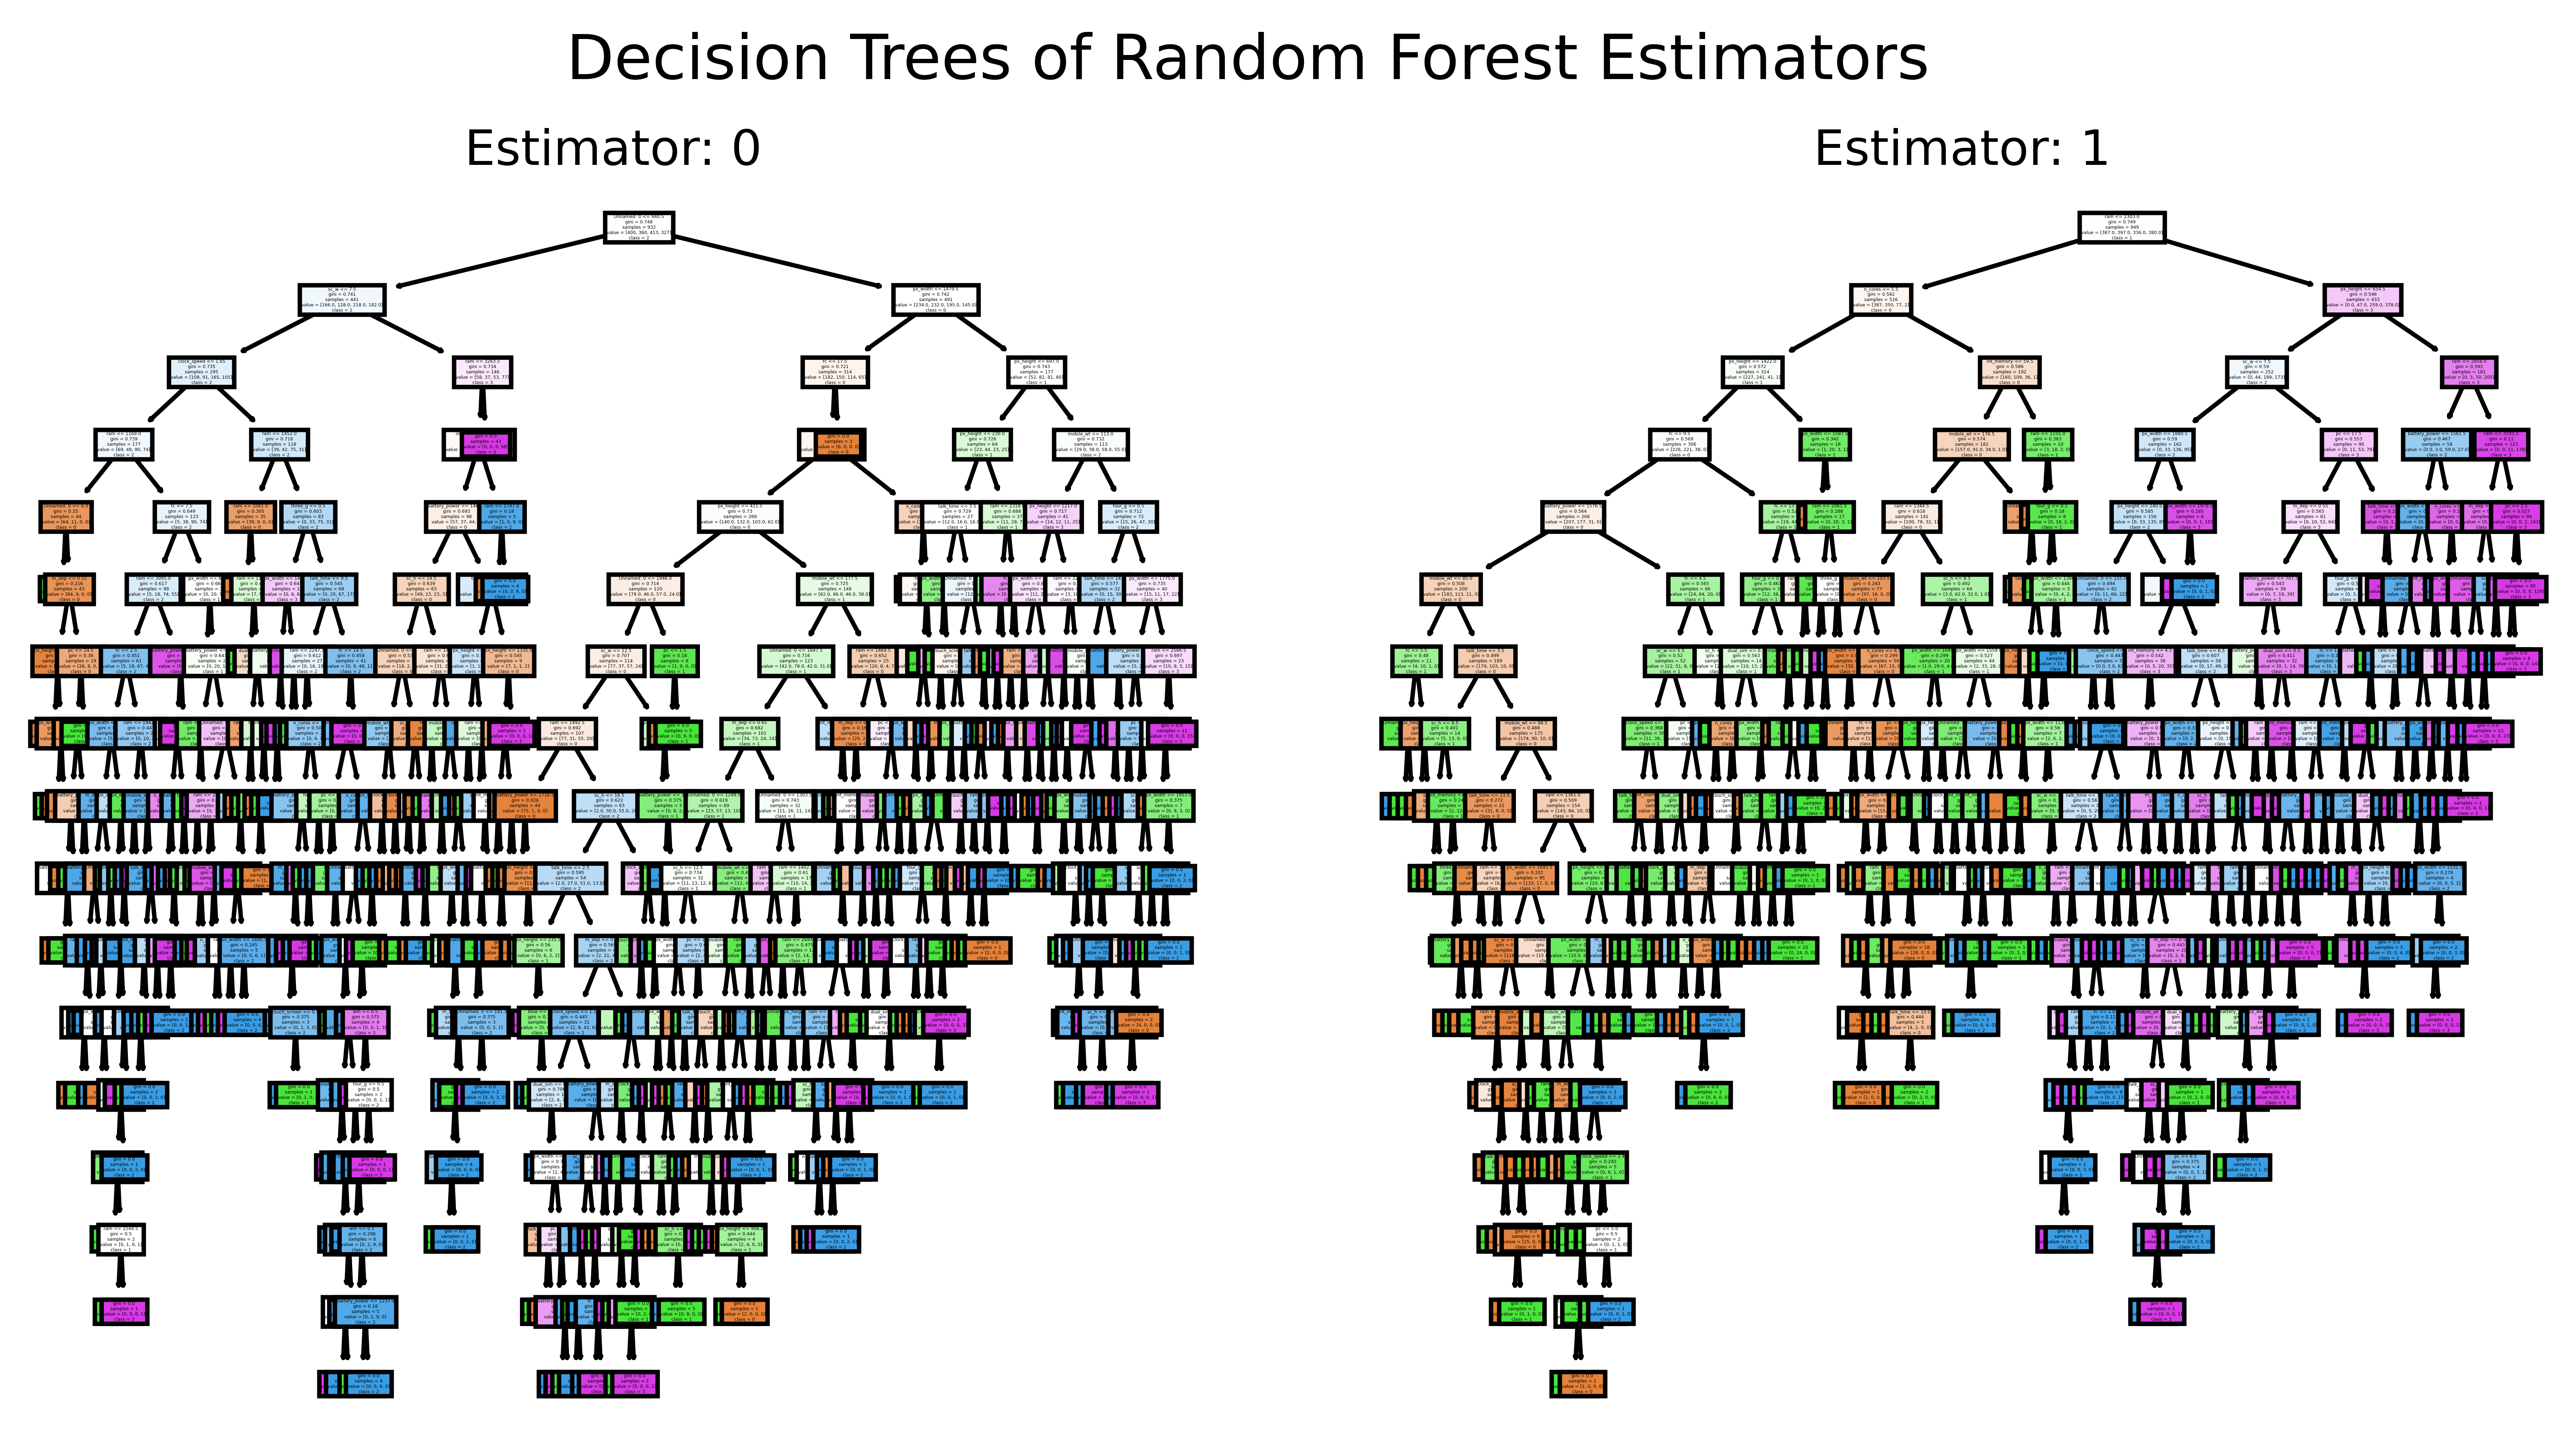

In [85]:
# Get the feature names and class names
fn = X.columns
cn = ["0", "1", "2", "3"]

# Create a figure with two subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5), dpi=900)

# Loop over the two estimators and plot the decision trees
for index in range(0, 2): # for example (2 Estimators)
    tree.plot_tree(RF_modelcv.estimators_[index], feature_names = fn, class_names=cn, filled = True, ax = axes[index]);
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
    
# Add overall title to the figure
fig.suptitle("Decision Trees of Random Forest Estimators", fontsize=14)
plt.show()

#### 🎄Tuned Model Feature Importance

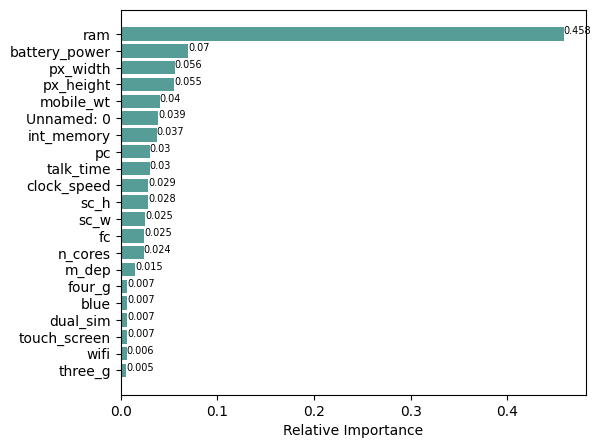

In [86]:
# Get feature importances from the Random Forest model
importances = RF_modelcv.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize=(6, 5))
plt.barh(range(len(indices)), importances[indices], color='#559d96', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Add labels to the bars
for i, v in enumerate(importances[indices]):
    plt.text(v, i, str(round(v, 3)), color='black', fontsize= 7)

plt.show()

<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#3a957f;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;">ㅤ3.3. Support Vector Machine (SVM)ㅤ</span>

<div style="background-color:black; padding:20px; font-size:15px ; color:white">
    
**Support Vector Machine (SVM)** is a popular machine learning algorithm used for classification, regression, and outlier detection tasks. The main idea behind SVM is to find the hyperplane that best separates the data into different classes. The hyperplane is chosen such that it maximizes the margin, which is the distance between the hyperplane and the closest data points from both classes. SVM is effective in dealing with both linearly separable and non-linearly separable data by transforming the data into a higher-dimensional space where the data becomes linearly separable. This is done using a kernel function, which allows SVM to work with complex data distributions without explicitly computing the transformed feature space. SVM has several advantages over other machine learning algorithms, including its ability to handle high-dimensional data, its ability to work with small and large datasets, and its robustness to overfitting. SVM has been successfully applied in a wide range of applications, including image and text classification, bioinformatics, and finance. However, SVM can be computationally expensive for large datasets and requires careful parameter tuning to achieve optimal performance.

#### 🎄X and y Arrays

In [87]:
X = df.drop('price_range', axis=1)
y = df['price_range'].values.reshape(-1, 1)

In [88]:
print ('X:', X.shape,'\ny:', y.shape)

X: (2000, 21) 
y: (2000, 1)


#### 🎄Find the Best Test Size

In [92]:
# Array of test size value from 0.2 to 0.3
test_size = np.arange(start=0.2, stop=0.35, step=0.05)

# Initialize a list where we'll store the score of each test size
score = []
for size in test_size:
    X_train3, X_test3, y_train3, y_test3 = train_test_split (X, y, test_size=size, random_state=0)
    svm_model = SVC()
    svm_model.fit (X_train3, y_train3)
    score.append (svm_model.score (X_test3, y_test3))
    
# Create a dataframe to display the results   
r= pd.DataFrame({'Test size': test_size, 'Score': score})
r.sort_values(by = ['Score'], ascending = False, inplace = True)
r.style.highlight_max(color='green')

<div style="background-color:black; padding:20px; font-size:15px ; color:white">

We consider the test size **0.2** for **SVM** modeling. 

#### 🎄Train Test Split

In [93]:
# Split X and y into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split (X, y, stratify=y, test_size = 0.2 , random_state = 0)

In [94]:
# check the shape of X_train, X_test, y_train and y_test
print('X_train shape:', X_train3.shape)
print('X_test shape:', X_test3.shape)
print('y_train shape:', y_train3.shape)
print('y_test shape:', y_test3.shape)

X_train shape: (1600, 21)
X_test shape: (400, 21)
y_train shape: (1600, 1)
y_test shape: (400, 1)


#### 🎄Feature Scaling

In [95]:
# Scale the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train3 = scaler.fit_transform(X_train3)

# Transform the test data using the same scaler
X_test3 = scaler.transform(X_test3)

#### 🎄Train SVM Model

In [97]:
# Instantiate the model
svm_model = SVC(probability=True)

# Fit the model to the training set
svm_model.fit(X_train3, y_train3)

SVC(probability=True)

#### 🎄Predict X-test

In [98]:
y_pred = svm_model.predict(X_test3)

#### 🎄Check Accuracy Score

In [99]:
print('Model Accuracy Score: {0:0.4f}'. format(accuracy_score(y_test3, y_pred)))

Model Accuracy Score: 0.8700


#### 🎄Check for Overfitting and Underfitting

In [100]:
# Scores on training and test set
print('Training set score: {:.4f}'.format(svm_model.score(X_train3, y_train3)))
print('Test set score: {:.4f}'.format(svm_model.score(X_test3, y_test3)))

Training set score: 0.9825
Test set score: 0.8700


#### 🎄K-Fold Cross-validation

In [101]:
kf = KFold(n_splits=10, shuffle=False)

#### 🎄Cross Validation Accuracy

In [102]:
score = cross_val_score(svm_model, X_train3, y_train3, cv=kf, scoring='accuracy')
svm_model_cv_score = score.mean()
svm_model_cv_stdev = stdev(score)
print('Cross Validation Accuracy scores are:\n {}'.format(score))

Cross Validation Accuracy scores are:
 [0.8125  0.85625 0.88125 0.86875 0.8375  0.85625 0.85    0.875   0.875
 0.8625 ]


In [103]:
Accuracy = ['Cross Validation Accuracy']
svm_A = pd.DataFrame({'CV Mean':svm_model_cv_score,'Std':svm_model_cv_stdev},index=Accuracy)
svm_A

CV Mean       Std
Cross Validation Accuracy   0.8575  0.020582

<div style="background-color:black; padding:20px; font-size:15px ; color:white">

**Interpretation:**

- Using the **mean cross-validation**, we can conclude that we expect the model to be around **86.31 %** accurate on average.
- We can see that 10-fold cross-validation accuracy **does not** result in performance improvement for this model.

#### 🎄Confusion Matrix

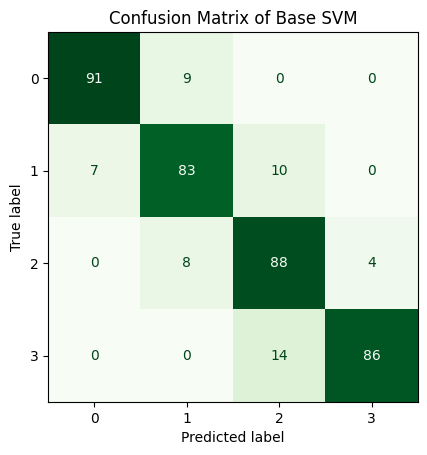

In [104]:
ConfusionMatrixDisplay.from_estimator(svm_model, X_test3, y_test3, colorbar=False, cmap='Greens')
plt.title('Confusion Matrix of Base SVM')
plt.grid(False)

#### 🎄Classification Report

In [105]:
print(classification_report(y_test3, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       100
           1       0.83      0.83      0.83       100
           2       0.79      0.88      0.83       100
           3       0.96      0.86      0.91       100

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



#### 🎄Performance Metrics

In [106]:
BaseSVM_result = metrics_calculator(y_test3, y_pred, 'Base SVM')
BaseSVM_result

Base SVM
Accuracy   0.870000
Precision  0.874960
Recall     0.870000
F1-score   0.871161

#### 🎄Roc Curve

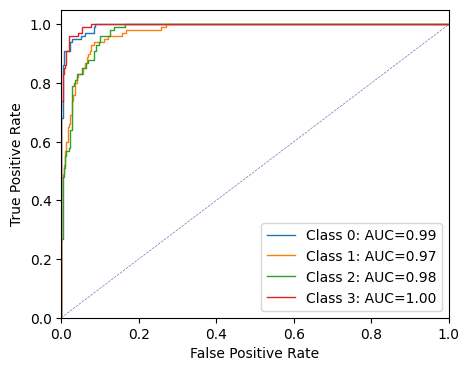

In [107]:
y_Pred_prob = svm_model.predict_proba(X_test3)

def roc_curve_plot(y_actual, y_predicted_probs, figsize=(5, 4), title=None, legend_loc='best'):

    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    thres = {}
    roc_auc = {}

    n_class = y_predicted_probs.shape[1]
    for i in range(n_class):
        fpr[i], tpr[i], thres[i] = roc_curve(y_actual == i, y_predicted_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Create a figure and plot the ROC curve for each class
    plt.figure(figsize=figsize)
    for i in range(n_class):
        plt.plot(fpr[i], tpr[i], linewidth=1, label='Class {}: AUC={:.2f}'.format(i, roc_auc[i]))

    # Add diagonal line and axis labels
    plt.plot([0, 1], [0, 1], '--', linewidth=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Set axis limits and add title and legend
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    if title is not None:
        plt.title(title)
    plt.legend(loc=legend_loc)

    # Show the plot
    plt.show()
        
roc_curve_plot(y_test3, y_Pred_prob)

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">🟢Tune SVM Hyperparameters Using GridSearchCV</p>

In [110]:
# Finding optimal hyperparameters(GridSearchCV)
from sklearn.model_selection import GridSearchCV

# Define model
model = SVC(probability=True)

# Define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

# Define search parameters   
C = [0.1, 1, 10, 100]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto']

#degree = [2, 3, 4]
#coef0 = [0, 1, 2]

param_grid = {'C': C, 'kernel': kernel, 'gamma': gamma} 

# Define search
search = GridSearchCV(model, param_grid, scoring='accuracy', n_jobs=-1, cv=cv)

# Execute search
GridSearchCV = search.fit(X_train3, y_train3)

# Set the clf to the best combination of parameters
svm_modelcv = GridSearchCV.best_estimator_

# Summarize result
print('Best Score: %s' % GridSearchCV.best_score_)
print('Best Hyperparameters: %s' % GridSearchCV.best_params_)

Best Score: 0.9652083333333333
Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


### Tuned SVM Model Evaluation

#### 🎄Train Tuned  Model

In [111]:
svm_modelcv.fit(X_train3, y_train3)

SVC(C=10, kernel='linear', probability=True)

#### 🎄Predict Tuned Model X-test

In [112]:
y_pred = svm_modelcv.predict(X_test3)

#### 🎄Check Tuned Model Accuracy Score

In [113]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test3, y_pred)))

Model accuracy score: 0.9725


#### 🎄Tuned Model Confusion Matrix

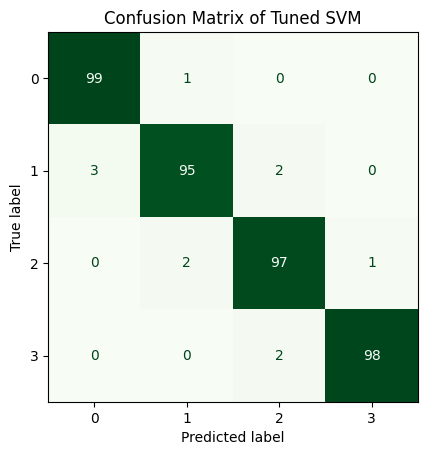

In [114]:
ConfusionMatrixDisplay.from_estimator(svm_modelcv, X_test3, y_test3, colorbar=False, cmap='Greens')
plt.title('Confusion Matrix of Tuned SVM')
plt.grid(False)

#### 🎄Tuned Model Classification Report

In [115]:
print(classification_report(y_test3, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       100
           1       0.97      0.95      0.96       100
           2       0.96      0.97      0.97       100
           3       0.99      0.98      0.98       100

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



#### 🎄Tuned Model Performance Metrics

In [116]:
TunedSVM_result = metrics_calculator(y_test3, y_pred, 'Tuned SVM')
TunedSVM_result

Tuned SVM
Accuracy    0.972500
Precision   0.972568
Recall      0.972500
F1-score    0.972473

#### 🎄Roc Curve

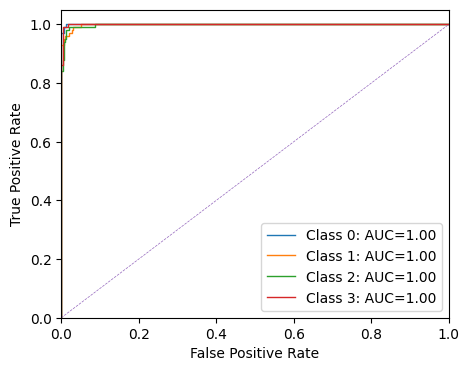

In [117]:
y_Pred_prob = svm_modelcv.predict_proba(X_test3)

def roc_curve_plot(y_actual, y_predicted_probs, figsize=(5, 4), title=None, legend_loc='best'):

    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    thres = {}
    roc_auc = {}

    n_class = y_predicted_probs.shape[1]
    for i in range(n_class):
        fpr[i], tpr[i], thres[i] = roc_curve(y_actual == i, y_predicted_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Create a figure and plot the ROC curve for each class
    plt.figure(figsize=figsize)
    for i in range(n_class):
        plt.plot(fpr[i], tpr[i], linewidth=1, label='Class {}: AUC={:.2f}'.format(i, roc_auc[i]))

    # Add diagonal line and axis labels
    plt.plot([0, 1], [0, 1], '--', linewidth=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Set axis limits and add title and legend
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    if title is not None:
        plt.title(title)
    plt.legend(loc=legend_loc)

    # Show the plot
    plt.show()
        
roc_curve_plot(y_test3, y_Pred_prob)

<a id="1"></a>  
# <p style="padding:10px;background-color:#254441;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Conclusion</p>

#### 🎄Test Size Used for each Models

|               | Base Decision Tree | Tuned Decision Tree | Post-pruning Decision Tree | Base Random Forest | Tuned Random Forest | Base SVM | Tuned SVM |
| ------------- | ------------- | -------------- | ---------------------- | -------- | --------- | -------- | --------- |
| **Test Size** |      0.25      |       0.25      |          0.25           |   0.25   |    0.25   |    0.2  |    0.2   |

#### 🎄Comparison Performance Metrics of different Classification Models

In [118]:
Conclusion = pd.concat([BaseDT_result, TunedDT_result, DT_Pruning_result, BaseRF_result, TunedRF_result, BaseSVM_result, TunedSVM_result], axis=1)
Conclusion

Base Decision Tree  Tuned Decision Tree  \
Accuracy             0.752000             0.852000   
Precision            0.762467             0.854249   
Recall               0.752000             0.852000   
F1-score             0.748901             0.851895   

           Post-pruning Decision Tree  Base Random Forest  \
Accuracy                     0.844000            0.884000   
Precision                    0.843351            0.885294   
Recall                       0.844000            0.884000   
F1-score                     0.843551            0.884055   

           Tuned Random Forest  Base SVM  Tuned SVM  
Accuracy              0.880000  0.870000   0.972500  
Precision             0.880778  0.874960   0.972568  
Recall                0.880000  0.870000   0.972500  
F1-score              0.879600  0.871161   0.972473

<div style="background-color:black; padding:20px; font-size:15px ; color:white">

- ✅Best **Accuracy**  ➡️  **Tuned SVM**
- ✅Best **Precision** ➡️  **Tuned SVM**
- ✅Best **Recall**    ➡️  **Tuned SVM**
- ✅Best **F1-score**  ➡️  **Tuned SVM**	

#### 🎄Comparison Confusion Matrix of different Classification Models

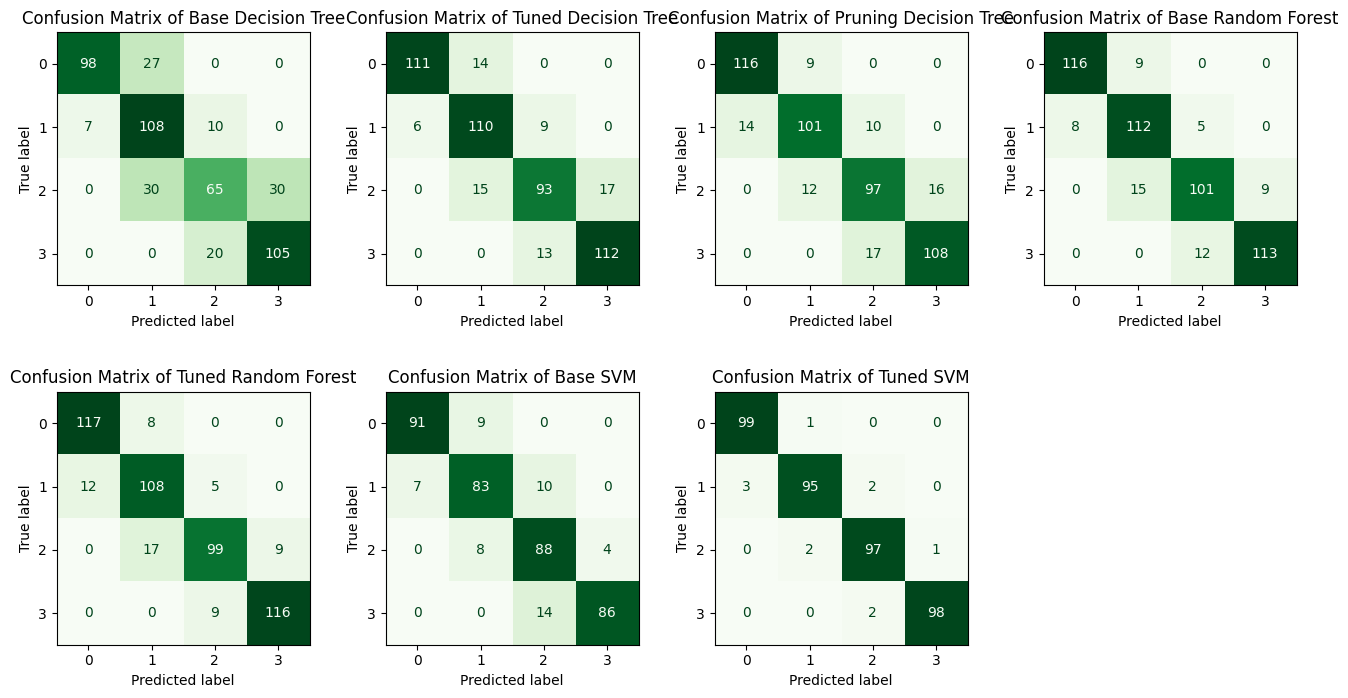

In [119]:
# Create subplots with 2 rows and 4 columns
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16,8))

# Plot confusion matrix for Base Decision Tree
ax = axs[0, 0]
disp = ConfusionMatrixDisplay.from_estimator(DT_model, X_test1, y_test1, colorbar=False, cmap='Greens', ax=ax)
disp.ax_.set_title('Confusion Matrix of Base Decision Tree')
disp.ax_.grid(False)

# Plot confusion matrix for Tuned Decision Tree
ax = axs[0, 1]
disp = ConfusionMatrixDisplay.from_estimator(DT_modelcv, X_test1, y_test1, colorbar=False, cmap='Greens', ax=ax)
disp.ax_.set_title('Confusion Matrix of Tuned Decision Tree')
disp.ax_.grid(False)

# Plot confusion matrix for Pruning Decision Tree
ax = axs[0, 2]
disp = ConfusionMatrixDisplay.from_estimator(DT_Pruning, X_test1, y_test1, colorbar=False, cmap='Greens', ax=ax)
disp.ax_.set_title('Confusion Matrix of Pruning Decision Tree')
disp.ax_.grid(False)

# Plot confusion matrix for Base Random Forest
ax = axs[0, 3]
disp = ConfusionMatrixDisplay.from_estimator(RF_model, X_test2, y_test2, colorbar=False, cmap='Greens', ax=ax)
disp.ax_.set_title('Confusion Matrix of Base Random Forest')
disp.ax_.grid(False)

# Plot confusion matrix for Tuned Random Forest
ax = axs[1, 0]
disp = ConfusionMatrixDisplay.from_estimator(RF_modelcv, X_test2, y_test2, colorbar=False, cmap='Greens', ax=ax)
disp.ax_.set_title('Confusion Matrix of Tuned Random Forest')
disp.ax_.grid(False)

# Plot confusion matrix for Base SVM
ax = axs[1, 1]
disp = ConfusionMatrixDisplay.from_estimator(svm_model, X_test3, y_test3, colorbar=False, cmap='Greens', ax=ax)
disp.ax_.set_title('Confusion Matrix of Base SVM')
disp.ax_.grid(False)

# Plot confusion matrix for Tuned SVM
ax = axs[1, 2]
disp = ConfusionMatrixDisplay.from_estimator(svm_modelcv, X_test3, y_test3, colorbar=False, cmap='Greens', ax=ax)
disp.ax_.set_title('Confusion Matrix of Tuned SVM')
disp.ax_.grid(False)

# Hide the last subplot
axs[1, 3].axis('off')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

plt.show()

|               | Base Decision Tree | Tuned Decision Tree | Pruned Decision Tree | Base Random Forest | Tuned Random Forest | Base SVM | Tuned SVM |
| ------------- | ------------- | -------------- | ---------------------- | -------- | --------- | -------- | --------- |
| **Test Size** | 0.25 | 0.25 | 0.25 | 0.25 | 0.25 | 0.2 | 0.2 |
| **✅Label 0** | 98 | 113 | 116 | 116 | 120 | 93 | 98 |
| **✅Label 1** | 108 | 112 | 109| 110 | 114 | 84 | 96 |
| **✅Label 2** | 65  | 97  | 97 | 104 | 105 | 88 | 98 |
| **✅Label 3** | 105 | 106 | 107 | 113 | 114 | 90 | 98 |
| **Total Correct Prediction** | 376 | 428 | 429 | 443 | 453 | 335 | 390 |

<div style="background-color:black; padding:20px; font-size:15px ; color:white">

- ✅Correct predictions of **Label 0** ➡️ Base Decision Tree **<** Tuned Decision Tree **<** Pruned Decision Tree and Tuned Random Forest **<** Base Random Forest **|** Base SVM **<** Tuned SVM
- ✅Correct predictions of **Label 1** ➡️ Tuned Decision Tree **<** Base Decision Tree **<** Base Random Forest **<** Pruned Decision Tree and Tuned Random Forest **|** Base SVM **<** Tuned SVM
- ✅Correct predictions of **Label 2** ➡️ Base Decision Tree **<** Tuned Decision Tree **<** Pruned Decision Tree **<** Base Random Forest **and** Tuned Random Forest **|** Base SVM **<** Tuned SVM
- ✅Correct predictions of **Label 3** ➡️ Base Decision Tree **<** Pruned Decision Tree **<** Tuned Decision Tree **<** Tuned Random Forest **<** Base Random Forest **|** Base SVM **<** Tuned SVM                                                                                                                       
- ✅**Total** correct prediction       ➡️ Base Decision Tree **<** Tuned Decision Tree **<** Pruned Decision Tree **<** Tuned Random Forest **<** Base Random Forest	**|** Base SVM **<** Tuned SVM

<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#c27849;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;">ㅤPredicting NEW Samplesㅤ</span>

In [120]:
Df_test.head()

Unnamed: 0  battery_power  blue  clock_speed  dual_sim  fc  four_g  \
0           0           1043     1          1.8         1  14       0   
1           1            841     1          0.5         1   4       1   
2           2           1807     1          2.8         0   1       0   
3           3           1546     0          0.5         1  18       1   
4           4           1434     0          1.4         0  11       1   

   int_memory  m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  \
0           5    0.5        193  ...  16        226      1412  3476    12   
1          61    0.8        191  ...  12        746       857  3895     6   
2          27    0.9        186  ...   4       1270      1366  2396    17   
3          25    0.5         96  ...  20        295      1752  3893    10   
4          49    0.5        108  ...  18        749       810  1773    15   

    sc_w  talk_time  three_g  touch_screen  wifi  
0   7.00          2        0             1     0  
1   2.54          7        1             0     0  
2  10.00         10        0             1     1  
3   2.54          7        1             1     0  
4   8.00          7        1             0     1  

[5 rows x 21 columns]

<div style="background-color:black; padding:20px; font-size:15px ; color:white">
 
**Explanations:**    
- Because the modeling was done on the scaled data of train dataset. 
- Hence, the test dataset should also be scaled before the prediction of new samples.

#### 🎄Feature Scaling on test data

In [121]:
# assign the column names of the original DataFrame to the cols variable
cols = Df_test.columns

In [122]:
# create an instance of the StandardScaler
scaler_test = StandardScaler()

# fit the scaler to the test data and transform it
scaled_test = scaler_test.fit_transform(Df_test)

In [123]:
# create a DataFrame from the scaled features of the test dataset
scaled_test = pd.DataFrame(scaled_test, columns=[cols])

In [124]:
scaled_test.head()

Unnamed: 0 battery_power      blue clock_speed  dual_sim        fc  \
0  -1.730320     -0.475451  0.968496    0.312601  0.966559  2.108676   
1  -1.726856     -0.942782  0.968496   -1.255832  0.966559 -0.132927   
2  -1.723391      1.292077  0.968496    1.519087 -1.034598 -0.805408   
3  -1.719927      0.688249 -1.032529   -1.255832  0.966559  3.005317   
4  -1.716463      0.429135 -1.032529   -0.169994 -1.034598  1.436195   

     four_g int_memory     m_dep mobile_wt  ...        pc px_height  px_width  \
0 -0.974329  -1.581269 -0.780240  1.535535  ...  0.976026 -0.938421  0.391912   
1  1.026347   1.509303  1.037089  1.478120  ...  0.319433  0.271556 -0.871028   
2 -0.974329  -0.367116  1.642865  1.334582  ... -0.993754  1.490841  0.287236   
3  1.026347  -0.477493 -0.780240 -1.249091  ...  1.632619 -0.777866  1.165604   
4  1.026347   0.847037 -0.780240 -0.904602  ...  1.304323  0.278537 -0.977979   

        ram      sc_h      sc_w talk_time   three_g touch_screen      wifi  
0  1.229373  0.001158  0.318074 -1.653355 -1.760216          1.0 -1.014099  
1  1.614643 -1.388231 -0.874757 -0.743418  0.568112         -1.0 -1.014099  
2  0.236313  1.158982  1.120427 -0.197456 -1.760216          1.0  0.986097  
3  1.612804 -0.461972 -0.874757 -0.743418  0.568112          1.0 -1.014099  
4 -0.336535  0.695852  0.585525 -0.743418  0.568112         -1.0  0.986097  

[5 rows x 21 columns]

#### 🎄Predict Price range

In [125]:
# Predict Price range based on Tuned SVM Model which was the best Model
predicted_price_range = svm_modelcv.predict(scaled_test)

In [126]:
# Create a new dataframe for the predicted price range
predicted_df = pd.DataFrame({'predicted_price_range': predicted_price_range})
predicted_df

predicted_price_range
0                        2
1                        3
2                        2
3                        3
4                        1
..                     ...
995                      2
996                      1
997                      0
998                      2
999                      2

[1000 rows x 1 columns]

In [127]:
new_samples = Df_test.copy()

In [128]:
# Add predicted price range to new_samples DataFrame
new_samples['pred_price_range'] = predicted_price_range
new_samples.head(10).style.set_properties(**{'background-color': '#7fc5ba'}, subset=['pred_price_range'])

In [129]:
# Mapping of price range values to names
price_range_map = {
    0: 'Low Cost',
    1: 'Medium Cost',
    2: 'High Cost',
    3: 'Very High Cost',
}

# Add a new column with mapped price ranges
new_samples['pred_price_range_name'] = new_samples['pred_price_range'].map(price_range_map)

# Display the updated dataframe
new_samples.tail(10).style.set_properties(**{'background-color': '#7fc5ba'}, subset=['pred_price_range_name'])

<a id="1"></a>  
# <p style="padding:10px;background-color:#254441;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">4. Ensemble Learning</p>

<div style="background-color:black; padding:20px; font-size:15px ; color:white">

**Ensembling** is a technique in machine learning that combines the predictions of multiple individual models to create a more powerful and accurate model. The idea behind ensembling is that by combining the predictions of several individual models, the overall accuracy and robustness of the model can be improved.

Ensembling can be done in various ways such as bagging, boosting, and stacking. Bagging or bootstrap aggregating is a technique where multiple models are trained independently on different subsets of the training data and then their predictions are combined. Boosting, on the other hand, involves training multiple models sequentially, with each subsequent model trying to correct the errors of the previous model. Stacking is a technique that combines the predictions of several models by training a meta-model to learn how to best combine the predictions of the individual models.

Ensembling can be a powerful technique for improving the accuracy and robustness of a model, especially when dealing with complex datasets or when individual models are prone to overfitting. However, it's important to note that ensembling can also increase the complexity of the model, making it harder to interpret and explain.

### 🎄Data Preparation

#### 🎄X and y Arrays

In [130]:
X = df.drop('price_range', axis=1)
y = df['price_range'].values.reshape(-1, 1)

In [131]:
print ('X:', X.shape,'\ny:', y.shape)

X: (2000, 21) 
y: (2000, 1)


#### 🎄Train Test Split

In [132]:
X_train, X_test, y_train, y_test = train_test_split (X, y, stratify=y, test_size = 0.2 , random_state = 0)

In [133]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (1600, 21)
X_test shape:  (400, 21)
y_train shape:  (1600, 1)
y_test shape:  (400, 1)


#### 🎄Feature Scaling

In [134]:
# Scale the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#3a957f;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;">ㅤ4.1. Voting Classifierㅤ</span>

<div style="background-color:black; padding:20px; font-size:15px ; color:white">

**Ensemble** methods are used in machine learning to improve the accuracy of a model by combining predictions from multiple submodels. A simple form of ensemble method is called **"Voting Classifier"**. This method combines predictions from different types of models by taking a majority vote (in classification) or average prediction (in regression) of the individual model predictions.

The submodels or basemodels used in a Voting Classifier can be of different types, such as decision trees, SVMs, or logistic regression models. By combining predictions from different types of models, the Voting Classifier can often achieve higher accuracy than any individual model alone.

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">🟢Base Voting Classifier</p>

In [135]:
# define the models to include in the ensemble
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier(max_depth=3)
svm_model = SVC(probability=True)

# create the ensemble model and fit it on the training set
ensemble_model = VotingClassifier(estimators=[('RF', rf_model), ('DT', dt_model), ('SVM', svm_model)], voting='soft')
ensemble_model.fit(X_train, y_train)

# make predictions on the test set and calculate and print the accuracy
predictions1 = ensemble_model.predict(X_test)
accuracy = metrics.accuracy_score(predictions1, y_test)
print('Accuracy of the Ensemble Model on the test set:', accuracy)

# calculate and print the mean cross-validated score of the ensemble model
cross_val_scores = cross_val_score(ensemble_model, X_train, y_train, cv=10, scoring='accuracy')
print('Cross-validated Score of the Ensemble Model:', cross_val_scores.mean())

Accuracy of the Ensemble Model on the test set: 0.8975
Cross-validated Score of the Ensemble Model: 0.87375


#### 🎄Performance Metrics for Base Voting Classifier Model

In [136]:
BaseVoting_Classifier_result = metrics_calculator(y_test, predictions1, 'Base Voting Classifier')
BaseVoting_Classifier_result

Base Voting Classifier
Accuracy                 0.897500
Precision                0.897469
Recall                   0.897500
F1-score                 0.897430

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">🟢Tuned Voting Classifier</p>

In [137]:
# define the models to include in the ensemble
rf_model = RandomForestClassifier(criterion='entropy', max_features='log2', n_estimators=500)
dt_model = DecisionTreeClassifier(ccp_alpha=0.0027, criterion='entropy', max_depth=7)
svm_model = SVC(C=10, kernel='linear', probability=True)

# create the ensemble model and fit it on the training set
ensemble_model1 = VotingClassifier(estimators=[('RF', rf_model), ('DT', dt_model), ('SVM', svm_model)], voting='soft')
ensemble_model1.fit(X_train, y_train)

# make predictions on the test set and calculate and print the accuracy
predictions2 = ensemble_model1.predict(X_test)
accuracy = metrics.accuracy_score(predictions2, y_test)
print('Accuracy of the Ensemble Model on the test set:', accuracy)

# calculate and print the mean cross-validated score of the ensemble model
cross_val_scores = cross_val_score(ensemble_model1, X_train, y_train, cv=10, scoring='accuracy')
print('Cross-validated Score of the Ensemble Model:', cross_val_scores.mean())

Accuracy of the Ensemble Model on the test set: 0.92
Cross-validated Score of the Ensemble Model: 0.9112500000000001


#### 🎄Performance Metrics for Tuned Voting Classifier Model

In [138]:
TunedVoting_Classifier_result = metrics_calculator(y_test, predictions2, 'Tuned Voting Classifier')
TunedVoting_Classifier_result

Tuned Voting Classifier
Accuracy                  0.920000
Precision                 0.920242
Recall                    0.920000
F1-score                  0.919904

<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#3a957f;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;">ㅤ4.2 Bagging (Bagged Decision Tree)ㅤ</span>

<div style="background-color:black; padding:20px; font-size:15px ; color:white">
    
**Bagging** is an ensemble learning method that involves training multiple classifiers on different subsets of the training data and combining their predictions to produce a final output. It is used to reduce variance and prevent overfitting. Bagging can be applied to any type of base classifier and has been used in various machine learning applications. However, it can be computationally expensive for large datasets and requires careful parameter tuning. Unlike the Voting Classifier, Bagging uses the same type of base classifier for each subset of the data.

#### 🎄Tuned Bagged Decision Tree

In [142]:
from sklearn.model_selection import GridSearchCV

# define the base decision tree model and the bagging model
base_model = DecisionTreeClassifier()
bagging_model = BaggingClassifier(estimator=base_model, random_state=0)

# create a dictionary of hyperparameters to search over
param_grid = {'estimator__max_depth': [4, 6],
              'estimator__min_samples_split': [4, 6],
              'n_estimators': [50, 100],
              'max_samples': [0.7, 1.0]}

# use GridSearchCV to search over the hyperparameter space
grid_search = GridSearchCV(bagging_model, param_grid, cv=5, scoring='accuracy')

# fit the grid search on the data
grid_search.fit(X_train, y_train)

# Set the clf to the best combination of parameters
Bagging = grid_search.best_estimator_

# print the best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'estimator__max_depth': 6, 'estimator__min_samples_split': 4, 'max_samples': 1.0, 'n_estimators': 50}


#### 🎄Train Tuned  Model

In [143]:
# fit the bagging model on the training set
Bagging.fit(X_train, y_train)

# make predictions on the test set and calculate and print the accuracy
predictions3 = Bagging.predict(X_test)
accuracy = metrics.accuracy_score(predictions3, y_test)
print('Accuracy of the Bagged Decision Tree Model on the test set:', accuracy)

# calculate and print the mean cross-validated score of the bagging model
cross_val_scores = cross_val_score(Bagging, X_train, y_train, cv=10, scoring='accuracy')
print('Cross-validated Score of the Bagged Decision Tree Model:', cross_val_scores.mean())

Accuracy of the Bagged Decision Tree Model on the test set: 0.8825
Cross-validated Score of the Bagged Decision Tree Model: 0.875625


#### 🎄Performance Metrics for Tuned Bagged Decision Tree Model

In [144]:
Bagged_DecisionTree_result = metrics_calculator(y_test, predictions3, 'Tuned Bagged Decision Tree')
Bagged_DecisionTree_result

Tuned Bagged Decision Tree
Accuracy                     0.882500
Precision                    0.882585
Recall                       0.882500
F1-score                     0.882050

<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#3a957f;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;">ㅤ4.3. Boosting (AdaBoost, Gradient Boosting & XGBoost)ㅤ</span>

<div style="background-color:black; padding:20px; font-size:15px ; color:white">
    
**Boosting** is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model. Boosting works as follows:

A model is first trained on the complete dataset. Now the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process continous, and new classifers are added to the model until the limit is reached on the accuracy.

<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#3a957f;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;">ㅤ4.3.1. AdaBoost (Adaptive Boosting)ㅤ</span>

#### 🎄Tuned AdaBoost (Adaptive Boosting)

In [146]:
from sklearn.model_selection import GridSearchCV

# define the AdaBoost model with default hyperparameters
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=0)

# define the hyperparameters to tune
params = {'n_estimators': [200, 500, 900], 'learning_rate': [0.1, 0.01, 1]}

# base_estimator__max_depth = [1, 2, 3, 4, 5]

# define the grid search using cross validation
grid_search = GridSearchCV(estimator=ada, param_grid=params, cv=10, scoring='accuracy')

# fit the grid search on the data
grid_search.fit(X_train, y_train)

# Set the clf to the best combination of parameters
AdaBoost = grid_search.best_estimator_

# print the best hyperparameters and their corresponding score
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'learning_rate': 0.1, 'n_estimators': 200}


#### 🎄Train Tuned  Model

In [147]:
# fit the AdaBoost model on the training set
AdaBoost.fit(X_train, y_train)

# make predictions on the test set and calculate and print the accuracy
predictions4 = AdaBoost.predict(X_test)
accuracy = metrics.accuracy_score(predictions4, y_test)
print('Accuracy of the AdaBoost on the test set:', accuracy)

# calculate and print the mean cross-validated score of the AdaBoost model
cross_val_scores = cross_val_score(AdaBoost, X_train, y_train, cv=10, scoring='accuracy')
print('The Cross-validated Score for AdaBoost is:', cross_val_scores.mean())

Accuracy of the AdaBoost on the test set: 0.8325
The Cross-validated Score for AdaBoost is: 0.8225000000000001


#### 🎄Performance Metrics for Tuned AdaBoost Model

In [148]:
AdaBoost_result = metrics_calculator(y_test, predictions4, 'Tuned AdaBoost')
AdaBoost_result

Tuned AdaBoost
Accuracy         0.832500
Precision        0.831714
Recall           0.832500
F1-score         0.831920

<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#c27849;font-size:200%;font-weight: 500;color:#254441;overflow:hidden;">ㅤConclusion of Ensembled Modelsㅤ</span>

In [150]:
Ensemble_Conclusion = pd.concat([BaseVoting_Classifier_result, TunedVoting_Classifier_result, Bagged_DecisionTree_result, AdaBoost_result], axis=1)
Ensemble_Conclusion

Base Voting Classifier  Tuned Voting Classifier  \
Accuracy                 0.897500                 0.920000   
Precision                0.897469                 0.920242   
Recall                   0.897500                 0.920000   
F1-score                 0.897430                 0.919904   

           Tuned Bagged Decision Tree  Tuned AdaBoost  
Accuracy                     0.882500        0.832500  
Precision                    0.882585        0.831714  
Recall                       0.882500        0.832500  
F1-score                     0.882050        0.831920

<div style="background-color:black; padding:20px; font-size:15px ; color:white">

The order of the ✅**Best Models** from top to bottom:

|       | **Model (Best from 1 to 6)** |
| :---  |   :---   |       
| **1** | Tuned Voting Classifier✅ |                 
| **2** | Base Voting Classifier |
| **3** | Tuned Bagged DecisionTree |                        
| **4** | Tuned AdaBoost |                      

<div style="background-color:black; padding:20px; font-size:15px ; color:white">

**Explanations:**
- We got the **Highest Accuracy** for **✅Tuned Voting Classifier**.

### Evaluation of Best Ensembled Model

#### 🎄Predict Best Ensembled Model X-test

In [151]:
# Tuned Voting Classifier
y_pred_tuned_ensemble = ensemble_model1.predict(X_test)

#### 🎄Confusion Matrix for the Best Model of Ensemble Learning

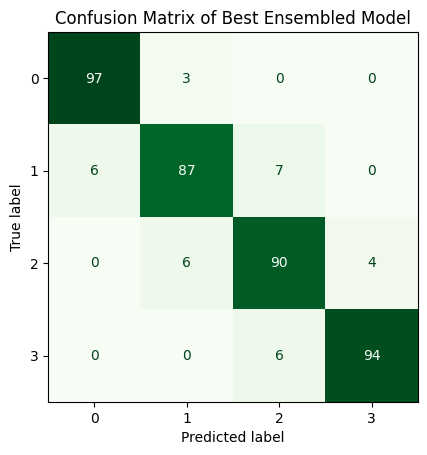

In [152]:
# Tuned Voting Classifier
ConfusionMatrixDisplay.from_estimator(ensemble_model1, X_test, y_test, colorbar=False, cmap='Greens')
plt.title('Confusion Matrix of Best Ensembled Model')
plt.grid(False)

#### 🎄Classification Report for the Best Model of Ensemble Learning

In [153]:
# Tuned Voting Classifier
print(classification_report(y_test, y_pred_tuned_ensemble))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       100
           1       0.91      0.87      0.89       100
           2       0.87      0.90      0.89       100
           3       0.96      0.94      0.95       100

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



#### 🎄Roc Curve for the Best Model of Ensemble Learning

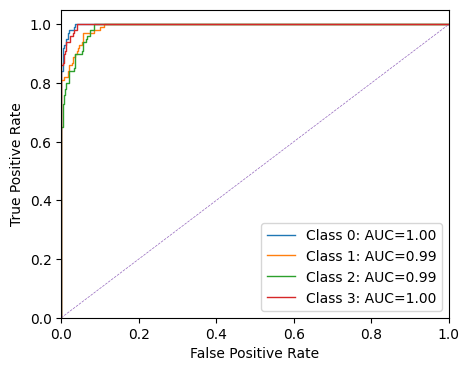

In [154]:
# Tuned Voting Classifier
y_Pred_prob = ensemble_model1.predict_proba(X_test)

def roc_curve_plot(y_actual, y_predicted_probs, figsize=(5, 4), title=None, legend_loc='best'):

    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    thres = {}
    roc_auc = {}

    n_class = y_predicted_probs.shape[1]
    for i in range(n_class):
        fpr[i], tpr[i], thres[i] = roc_curve(y_actual == i, y_predicted_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Create a figure and plot the ROC curve for each class
    plt.figure(figsize=figsize)
    for i in range(n_class):
        plt.plot(fpr[i], tpr[i], linewidth=1, label='Class {}: AUC={:.2f}'.format(i, roc_auc[i]))

    # Add diagonal line and axis labels
    plt.plot([0, 1], [0, 1], '--', linewidth=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Set axis limits and add title and legend
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    if title is not None:
        plt.title(title)
    plt.legend(loc=legend_loc)

    # Show the plot
    plt.show()
        
roc_curve_plot(y_test, y_Pred_prob)

## The End